In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('Education+-+Post+12th+Standard.csv')
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  
0        78       18.1           12    7041         60  
1        30       12.2           16   10527         56  
2        66       12.9           30    8735         54  
3        97        7.7           37   19016         59  
4        72       11.9            2   10922         15

# 2.1) Perform Exploratory Data Analysis [both univariate and multivariate analysis to be performed]. The inferences drawn from this should be properly documented.

### Performing basic EDA

#### - Shape

In [4]:
print('The data contains',df.shape[0],'rows and',df.shape[1],'columns')

The data contains 777 rows and 18 columns


#### - Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Names        777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

- As observed there are 777 non null values in each column
- The data type of every column is wither int64 or float 64, except for one, Names is object

#### Checking null and duplicates

In [6]:
df.isnull().sum()

Names          0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [7]:
dups = df.duplicated()
print('No of duplicate rows:',sum(dups))

No of duplicate rows: 0


#### Checking unique values in Names column

In [8]:
print('The names column has',df.Names.nunique(),'unique values')

The names column has 777 unique values


#### Checking Summary

In [9]:
df_des = df.describe().T

In [10]:
df_des["IQR"] = df_des["75%"]-df_des["25%"]
df_des["CV"] = df_des["std"]/df_des["mean"]
df_des["Skewness"]=df.skew()
df_des

count          mean          std     min     25%     50%  \
Apps         777.0   3001.638353  3870.201484    81.0   776.0  1558.0   
Accept       777.0   2018.804376  2451.113971    72.0   604.0  1110.0   
Enroll       777.0    779.972973   929.176190    35.0   242.0   434.0   
Top10perc    777.0     27.558559    17.640364     1.0    15.0    23.0   
Top25perc    777.0     55.796654    19.804778     9.0    41.0    54.0   
F.Undergrad  777.0   3699.907336  4850.420531   139.0   992.0  1707.0   
P.Undergrad  777.0    855.298584  1522.431887     1.0    95.0   353.0   
Outstate     777.0  10440.669241  4023.016484  2340.0  7320.0  9990.0   
Room.Board   777.0   4357.526384  1096.696416  1780.0  3597.0  4200.0   
Books        777.0    549.380952   165.105360    96.0   470.0   500.0   
Personal     777.0   1340.642214   677.071454   250.0   850.0  1200.0   
PhD          777.0     72.660232    16.328155     8.0    62.0    75.0   
Terminal     777.0     79.702703    14.722359    24.0    71.0    82.0   
S.F.Ratio    777.0     14.089704     3.958349     2.5    11.5    13.6   
perc.alumni  777.0     22.743887    12.391801     0.0    13.0    21.0   
Expend       777.0   9660.171171  5221.768440  3186.0  6751.0  8377.0   
Grad.Rate    777.0     65.463320    17.177710    10.0    53.0    65.0   

                 75%      max     IQR        CV  Skewness  
Apps          3624.0  48094.0  2848.0  1.289363  3.723750  
Accept        2424.0  26330.0  1820.0  1.214141  3.417727  
Enroll         902.0   6392.0   660.0  1.191293  2.690465  
Top10perc       35.0     96.0    20.0  0.640105  1.413217  
Top25perc       69.0    100.0    28.0  0.354946  0.259340  
F.Undergrad   4005.0  31643.0  3013.0  1.310957  2.610458  
P.Undergrad    967.0  21836.0   872.0  1.780000  5.692353  
Outstate     12925.0  21700.0  5605.0  0.385322  0.509278  
Room.Board    5050.0   8124.0  1453.0  0.251679  0.477356  
Books          600.0   2340.0   130.0  0.300530  3.485025  
Personal      1700.0   6800.0   850.0  0.505035  1.742497  
PhD             85.0    103.0    23.0  0.224719 -0.768170  
Terminal        92.0    100.0    21.0  0.184716 -0.816542  
S.F.Ratio       16.5     39.8     5.0  0.280939  0.667435  
perc.alumni     31.0     64.0    18.0  0.544841  0.606891  
Expend       10830.0  56233.0  4079.0  0.540546  3.459322  
Grad.Rate       78.0    118.0    25.0  0.262402 -0.113777

- There seems to be a problem with PhD and Grad Rate
- PhD is in percentage, and it can't be greater than 100 in this case
- Grad Rate > 100 would mean more no of students have passed than enrolled, which is practically impossoble
- These will be taken care of in the data cleaning steps

#### Before going into univariate we can have a look at the Pandas profiling

### Univariate analysis

In [14]:
# Creating new columns: Expenditure and Acceptance Rate
df['Expenditure'] = df['Room.Board']+df['Books'] + df['Personal']
df['Acceptance Rate'] = df['Accept']/df["Apps"] * 100

In [16]:
# Updating the description
df_des = df.describe().T
df_des["IQR"] = df_des["75%"]-df_des["25%"]
df_des["CV"] = df_des["std"]/df_des["mean"]
df_des["Skewness"]=df.skew()
df_des

count          mean          std          min          25%  \
Apps             777.0   3001.638353  3870.201484    81.000000   776.000000   
Accept           777.0   2018.804376  2451.113971    72.000000   604.000000   
Enroll           777.0    779.972973   929.176190    35.000000   242.000000   
Top10perc        777.0     27.558559    17.640364     1.000000    15.000000   
Top25perc        777.0     55.796654    19.804778     9.000000    41.000000   
F.Undergrad      777.0   3699.907336  4850.420531   139.000000   992.000000   
P.Undergrad      777.0    855.298584  1522.431887     1.000000    95.000000   
Outstate         777.0  10440.669241  4023.016484  2340.000000  7320.000000   
Room.Board       777.0   4357.526384  1096.696416  1780.000000  3597.000000   
Books            777.0    549.380952   165.105360    96.000000   470.000000   
Personal         777.0   1340.642214   677.071454   250.000000   850.000000   
PhD              777.0     72.660232    16.328155     8.000000    62.000000   
Terminal         777.0     79.702703    14.722359    24.000000    71.000000   
S.F.Ratio        777.0     14.089704     3.958349     2.500000    11.500000   
perc.alumni      777.0     22.743887    12.391801     0.000000    13.000000   
Expend           777.0   9660.171171  5221.768440  3186.000000  6751.000000   
Grad.Rate        777.0     65.463320    17.177710    10.000000    53.000000   
Expenditure      777.0   6247.549550  1216.013036  3452.000000  5400.000000   
Acceptance Rate  777.0     74.692771    14.710392    15.448631    67.564745   

                      50%           75%      max          IQR        CV  \
Apps             1558.000   3624.000000  48094.0  2848.000000  1.289363   
Accept           1110.000   2424.000000  26330.0  1820.000000  1.214141   
Enroll            434.000    902.000000   6392.0   660.000000  1.191293   
Top10perc          23.000     35.000000     96.0    20.000000  0.640105   
Top25perc          54.000     69.000000    100.0    28.000000  0.354946   
F.Undergrad      1707.000   4005.000000  31643.0  3013.000000  1.310957   
P.Undergrad       353.000    967.000000  21836.0   872.000000  1.780000   
Outstate         9990.000  12925.000000  21700.0  5605.000000  0.385322   
Room.Board       4200.000   5050.000000   8124.0  1453.000000  0.251679   
Books             500.000    600.000000   2340.0   130.000000  0.300530   
Personal         1200.000   1700.000000   6800.0   850.000000  0.505035   
PhD                75.000     85.000000    103.0    23.000000  0.224719   
Terminal           82.000     92.000000    100.0    21.000000  0.184716   
S.F.Ratio          13.600     16.500000     39.8     5.000000  0.280939   
perc.alumni        21.000     31.000000     64.0    18.000000  0.544841   
Expend           8377.000  10830.000000  56233.0  4079.000000  0.540546   
Grad.Rate          65.000     78.000000    118.0    25.000000  0.262402   
Expenditure      6100.000   6958.000000  12330.0  1558.000000  0.194638   
Acceptance Rate    77.875     84.852217    100.0    17.287472  0.196945   

                 Skewness  
Apps             3.723750  
Accept           3.417727  
Enroll           2.690465  
Top10perc        1.413217  
Top25perc        0.259340  
F.Undergrad      2.610458  
P.Undergrad      5.692353  
Outstate         0.509278  
Room.Board       0.477356  
Books            3.485025  
Personal         1.742497  
PhD             -0.768170  
Terminal        -0.816542  
S.F.Ratio        0.667435  
perc.alumni      0.606891  
Expend           3.459322  
Grad.Rate       -0.113777  
Expenditure      0.567391  
Acceptance Rate -1.068202

In [17]:
def univariate(col):
    print('Description of',col)
    print('----------------------------------------------------')
    print(df[col].describe())
    print('Median:',df[col].median())
    print('Mean:',df[col].mean())
    print('Mode: ',df[col].mode())
    print('----------------------------------------------------')
    print('\nDistribution of',col)
    

    sns.displot(x=df[col],kde=True,height=3)
    
    plt.axvline(df[col].mean(),color='green',label='Mean')    
    plt.axvline(df[col].median(),color='blue',label='Median')
    plt.axvline(df[col].mode()[0],color='red',label='Mode1')
    
    plt.legend()
    plt.show()
    print('----------------------------------------------------')
    print('\nBOXPLOT of',col)
    plt.figure(figsize = (3,2))
    sns.boxplot(x = df[col],width=.8)
    plt.show()

Description of Apps
----------------------------------------------------
count      777.000000
mean      3001.638353
std       3870.201484
min         81.000000
25%        776.000000
50%       1558.000000
75%       3624.000000
max      48094.000000
Name: Apps, dtype: float64
Median: 1558.0
Mean: 3001.6383526383524
Mode:  0     440
1     663
2    1006
dtype: int64
----------------------------------------------------

Distribution of Apps


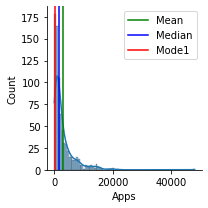

----------------------------------------------------

BOXPLOT of Apps


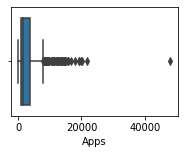

Description of Accept
----------------------------------------------------
count      777.000000
mean      2018.804376
std       2451.113971
min         72.000000
25%        604.000000
50%       1110.000000
75%       2424.000000
max      26330.000000
Name: Accept, dtype: float64
Median: 1110.0
Mean: 2018.8043758043757
Mode:  0    452
dtype: int64
----------------------------------------------------

Distribution of Accept


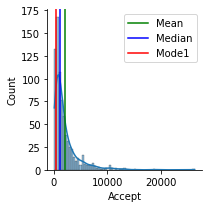

----------------------------------------------------

BOXPLOT of Accept


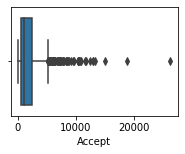

Description of Enroll
----------------------------------------------------
count     777.000000
mean      779.972973
std       929.176190
min        35.000000
25%       242.000000
50%       434.000000
75%       902.000000
max      6392.000000
Name: Enroll, dtype: float64
Median: 434.0
Mean: 779.972972972973
Mode:  0    177
1    295
dtype: int64
----------------------------------------------------

Distribution of Enroll


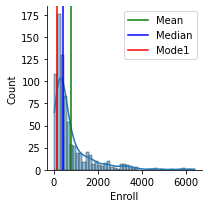

----------------------------------------------------

BOXPLOT of Enroll


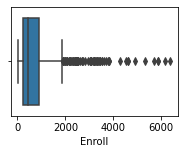

Description of Top10perc
----------------------------------------------------
count    777.000000
mean      27.558559
std       17.640364
min        1.000000
25%       15.000000
50%       23.000000
75%       35.000000
max       96.000000
Name: Top10perc, dtype: float64
Median: 23.0
Mean: 27.55855855855856
Mode:  0    20
dtype: int64
----------------------------------------------------

Distribution of Top10perc


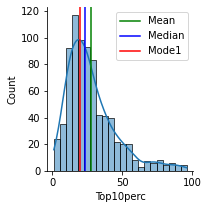

----------------------------------------------------

BOXPLOT of Top10perc


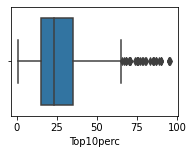

Description of Top25perc
----------------------------------------------------
count    777.000000
mean      55.796654
std       19.804778
min        9.000000
25%       41.000000
50%       54.000000
75%       69.000000
max      100.000000
Name: Top25perc, dtype: float64
Median: 54.0
Mean: 55.7966537966538
Mode:  0    55
1    60
dtype: int64
----------------------------------------------------

Distribution of Top25perc


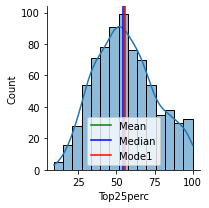

----------------------------------------------------

BOXPLOT of Top25perc


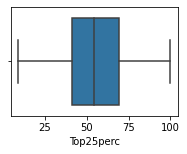

Description of F.Undergrad
----------------------------------------------------
count      777.000000
mean      3699.907336
std       4850.420531
min        139.000000
25%        992.000000
50%       1707.000000
75%       4005.000000
max      31643.000000
Name: F.Undergrad, dtype: float64
Median: 1707.0
Mean: 3699.907335907336
Mode:  0     500
1     662
2     959
3    1115
4    1306
5    1345
6    1707
dtype: int64
----------------------------------------------------

Distribution of F.Undergrad


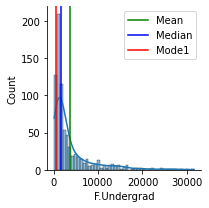

----------------------------------------------------

BOXPLOT of F.Undergrad


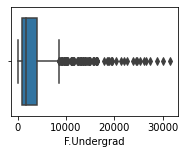

Description of P.Undergrad
----------------------------------------------------
count      777.000000
mean       855.298584
std       1522.431887
min          1.000000
25%         95.000000
50%        353.000000
75%        967.000000
max      21836.000000
Name: P.Undergrad, dtype: float64
Median: 353.0
Mean: 855.2985842985843
Mode:  0    30
dtype: int64
----------------------------------------------------

Distribution of P.Undergrad


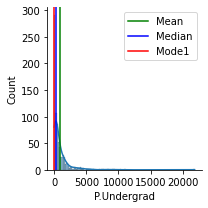

----------------------------------------------------

BOXPLOT of P.Undergrad


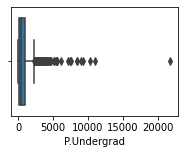

Description of Outstate
----------------------------------------------------
count      777.000000
mean     10440.669241
std       4023.016484
min       2340.000000
25%       7320.000000
50%       9990.000000
75%      12925.000000
max      21700.000000
Name: Outstate, dtype: float64
Median: 9990.0
Mean: 10440.66924066924
Mode:  0    6550
dtype: int64
----------------------------------------------------

Distribution of Outstate


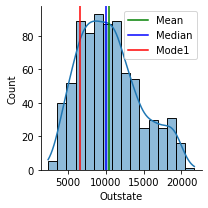

----------------------------------------------------

BOXPLOT of Outstate


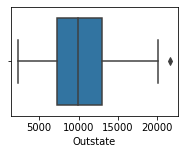

Description of Room.Board
----------------------------------------------------
count     777.000000
mean     4357.526384
std      1096.696416
min      1780.000000
25%      3597.000000
50%      4200.000000
75%      5050.000000
max      8124.000000
Name: Room.Board, dtype: float64
Median: 4200.0
Mean: 4357.526383526383
Mode:  0    4100
dtype: int64
----------------------------------------------------

Distribution of Room.Board


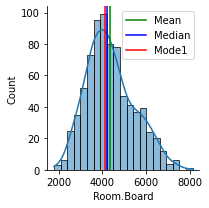

----------------------------------------------------

BOXPLOT of Room.Board


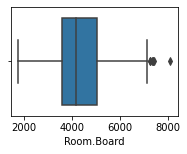

Description of Books
----------------------------------------------------
count     777.000000
mean      549.380952
std       165.105360
min        96.000000
25%       470.000000
50%       500.000000
75%       600.000000
max      2340.000000
Name: Books, dtype: float64
Median: 500.0
Mean: 549.3809523809524
Mode:  0    500
dtype: int64
----------------------------------------------------

Distribution of Books


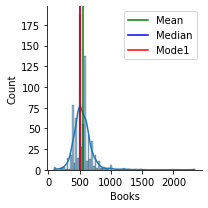

----------------------------------------------------

BOXPLOT of Books


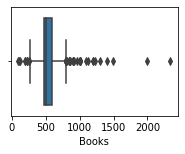

Description of Personal
----------------------------------------------------
count     777.000000
mean     1340.642214
std       677.071454
min       250.000000
25%       850.000000
50%      1200.000000
75%      1700.000000
max      6800.000000
Name: Personal, dtype: float64
Median: 1200.0
Mean: 1340.6422136422136
Mode:  0    1000
dtype: int64
----------------------------------------------------

Distribution of Personal


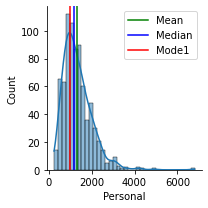

----------------------------------------------------

BOXPLOT of Personal


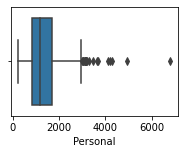

Description of PhD
----------------------------------------------------
count    777.000000
mean      72.660232
std       16.328155
min        8.000000
25%       62.000000
50%       75.000000
75%       85.000000
max      103.000000
Name: PhD, dtype: float64
Median: 75.0
Mean: 72.66023166023166
Mode:  0    77
dtype: int64
----------------------------------------------------

Distribution of PhD


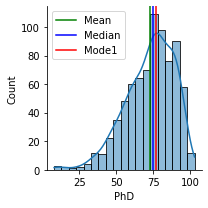

----------------------------------------------------

BOXPLOT of PhD


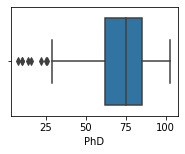

Description of Terminal
----------------------------------------------------
count    777.000000
mean      79.702703
std       14.722359
min       24.000000
25%       71.000000
50%       82.000000
75%       92.000000
max      100.000000
Name: Terminal, dtype: float64
Median: 82.0
Mean: 79.70270270270271
Mode:  0    96
dtype: int64
----------------------------------------------------

Distribution of Terminal


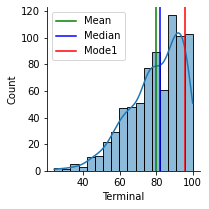

----------------------------------------------------

BOXPLOT of Terminal


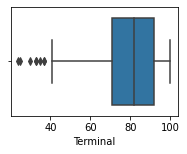

Description of S.F.Ratio
----------------------------------------------------
count    777.000000
mean      14.089704
std        3.958349
min        2.500000
25%       11.500000
50%       13.600000
75%       16.500000
max       39.800000
Name: S.F.Ratio, dtype: float64
Median: 13.6
Mean: 14.089703989703986
Mode:  0    12.1
dtype: float64
----------------------------------------------------

Distribution of S.F.Ratio


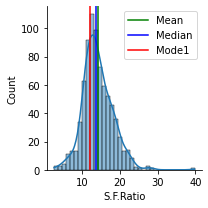

----------------------------------------------------

BOXPLOT of S.F.Ratio


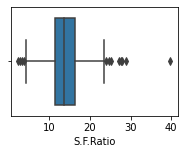

Description of perc.alumni
----------------------------------------------------
count    777.000000
mean      22.743887
std       12.391801
min        0.000000
25%       13.000000
50%       21.000000
75%       31.000000
max       64.000000
Name: perc.alumni, dtype: float64
Median: 21.0
Mean: 22.743886743886744
Mode:  0    10
dtype: int64
----------------------------------------------------

Distribution of perc.alumni


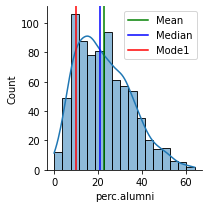

----------------------------------------------------

BOXPLOT of perc.alumni


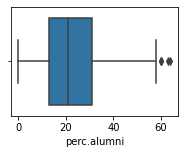

Description of Expend
----------------------------------------------------
count      777.000000
mean      9660.171171
std       5221.768440
min       3186.000000
25%       6751.000000
50%       8377.000000
75%      10830.000000
max      56233.000000
Name: Expend, dtype: float64
Median: 8377.0
Mean: 9660.17117117117
Mode:  0      4900
1      5935
2      6333
3      6413
4      6433
5      6562
6      6716
7      6719
8      6898
9      6971
10     7041
11     7114
12     7309
13     7348
14     7762
15     7881
16     7940
17     8118
18     8135
19     8189
20     8324
21     8355
22     8604
23     8686
24     8847
25     8954
26     9084
27     9158
28     9209
29     9431
30    10872
31    10912
32    10922
dtype: int64
----------------------------------------------------

Distribution of Expend


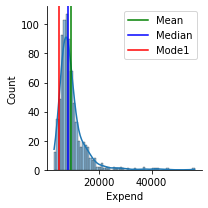

----------------------------------------------------

BOXPLOT of Expend


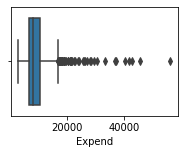

Description of Grad.Rate
----------------------------------------------------
count    777.00000
mean      65.46332
std       17.17771
min       10.00000
25%       53.00000
50%       65.00000
75%       78.00000
max      118.00000
Name: Grad.Rate, dtype: float64
Median: 65.0
Mean: 65.46332046332046
Mode:  0    72
dtype: int64
----------------------------------------------------

Distribution of Grad.Rate


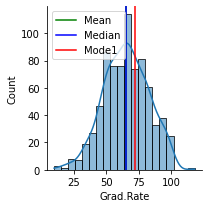

----------------------------------------------------

BOXPLOT of Grad.Rate


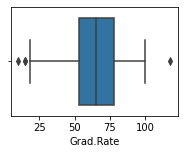

Description of Expenditure
----------------------------------------------------
count      777.000000
mean      6247.549550
std       1216.013036
min       3452.000000
25%       5400.000000
50%       6100.000000
75%       6958.000000
max      12330.000000
Name: Expenditure, dtype: float64
Median: 6100.0
Mean: 6247.54954954955
Mode:  0    5700
1    5800
2    5950
dtype: int64
----------------------------------------------------

Distribution of Expenditure


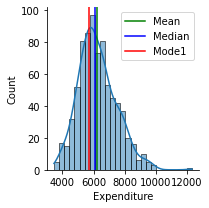

----------------------------------------------------

BOXPLOT of Expenditure


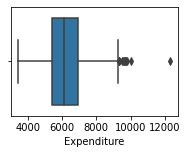

Description of Acceptance Rate
----------------------------------------------------
count    777.000000
mean      74.692771
std       14.710392
min       15.448631
25%       67.564745
50%       77.875000
75%       84.852217
max      100.000000
Name: Acceptance Rate, dtype: float64
Median: 77.875
Mean: 74.69277072775408
Mode:  0    100.0
dtype: float64
----------------------------------------------------

Distribution of Acceptance Rate


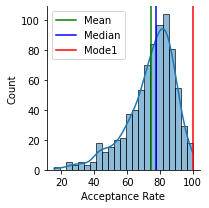

----------------------------------------------------

BOXPLOT of Acceptance Rate


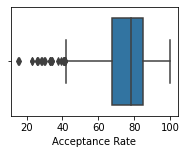

In [18]:
for i in df.select_dtypes(include = ['float64','int64']).columns:
    univariate(i)

### Multivariate Analysis

- To get the strength of the relationships, we can plot a pairplot or a heatmap

<Figure size 1440x1080 with 0 Axes>

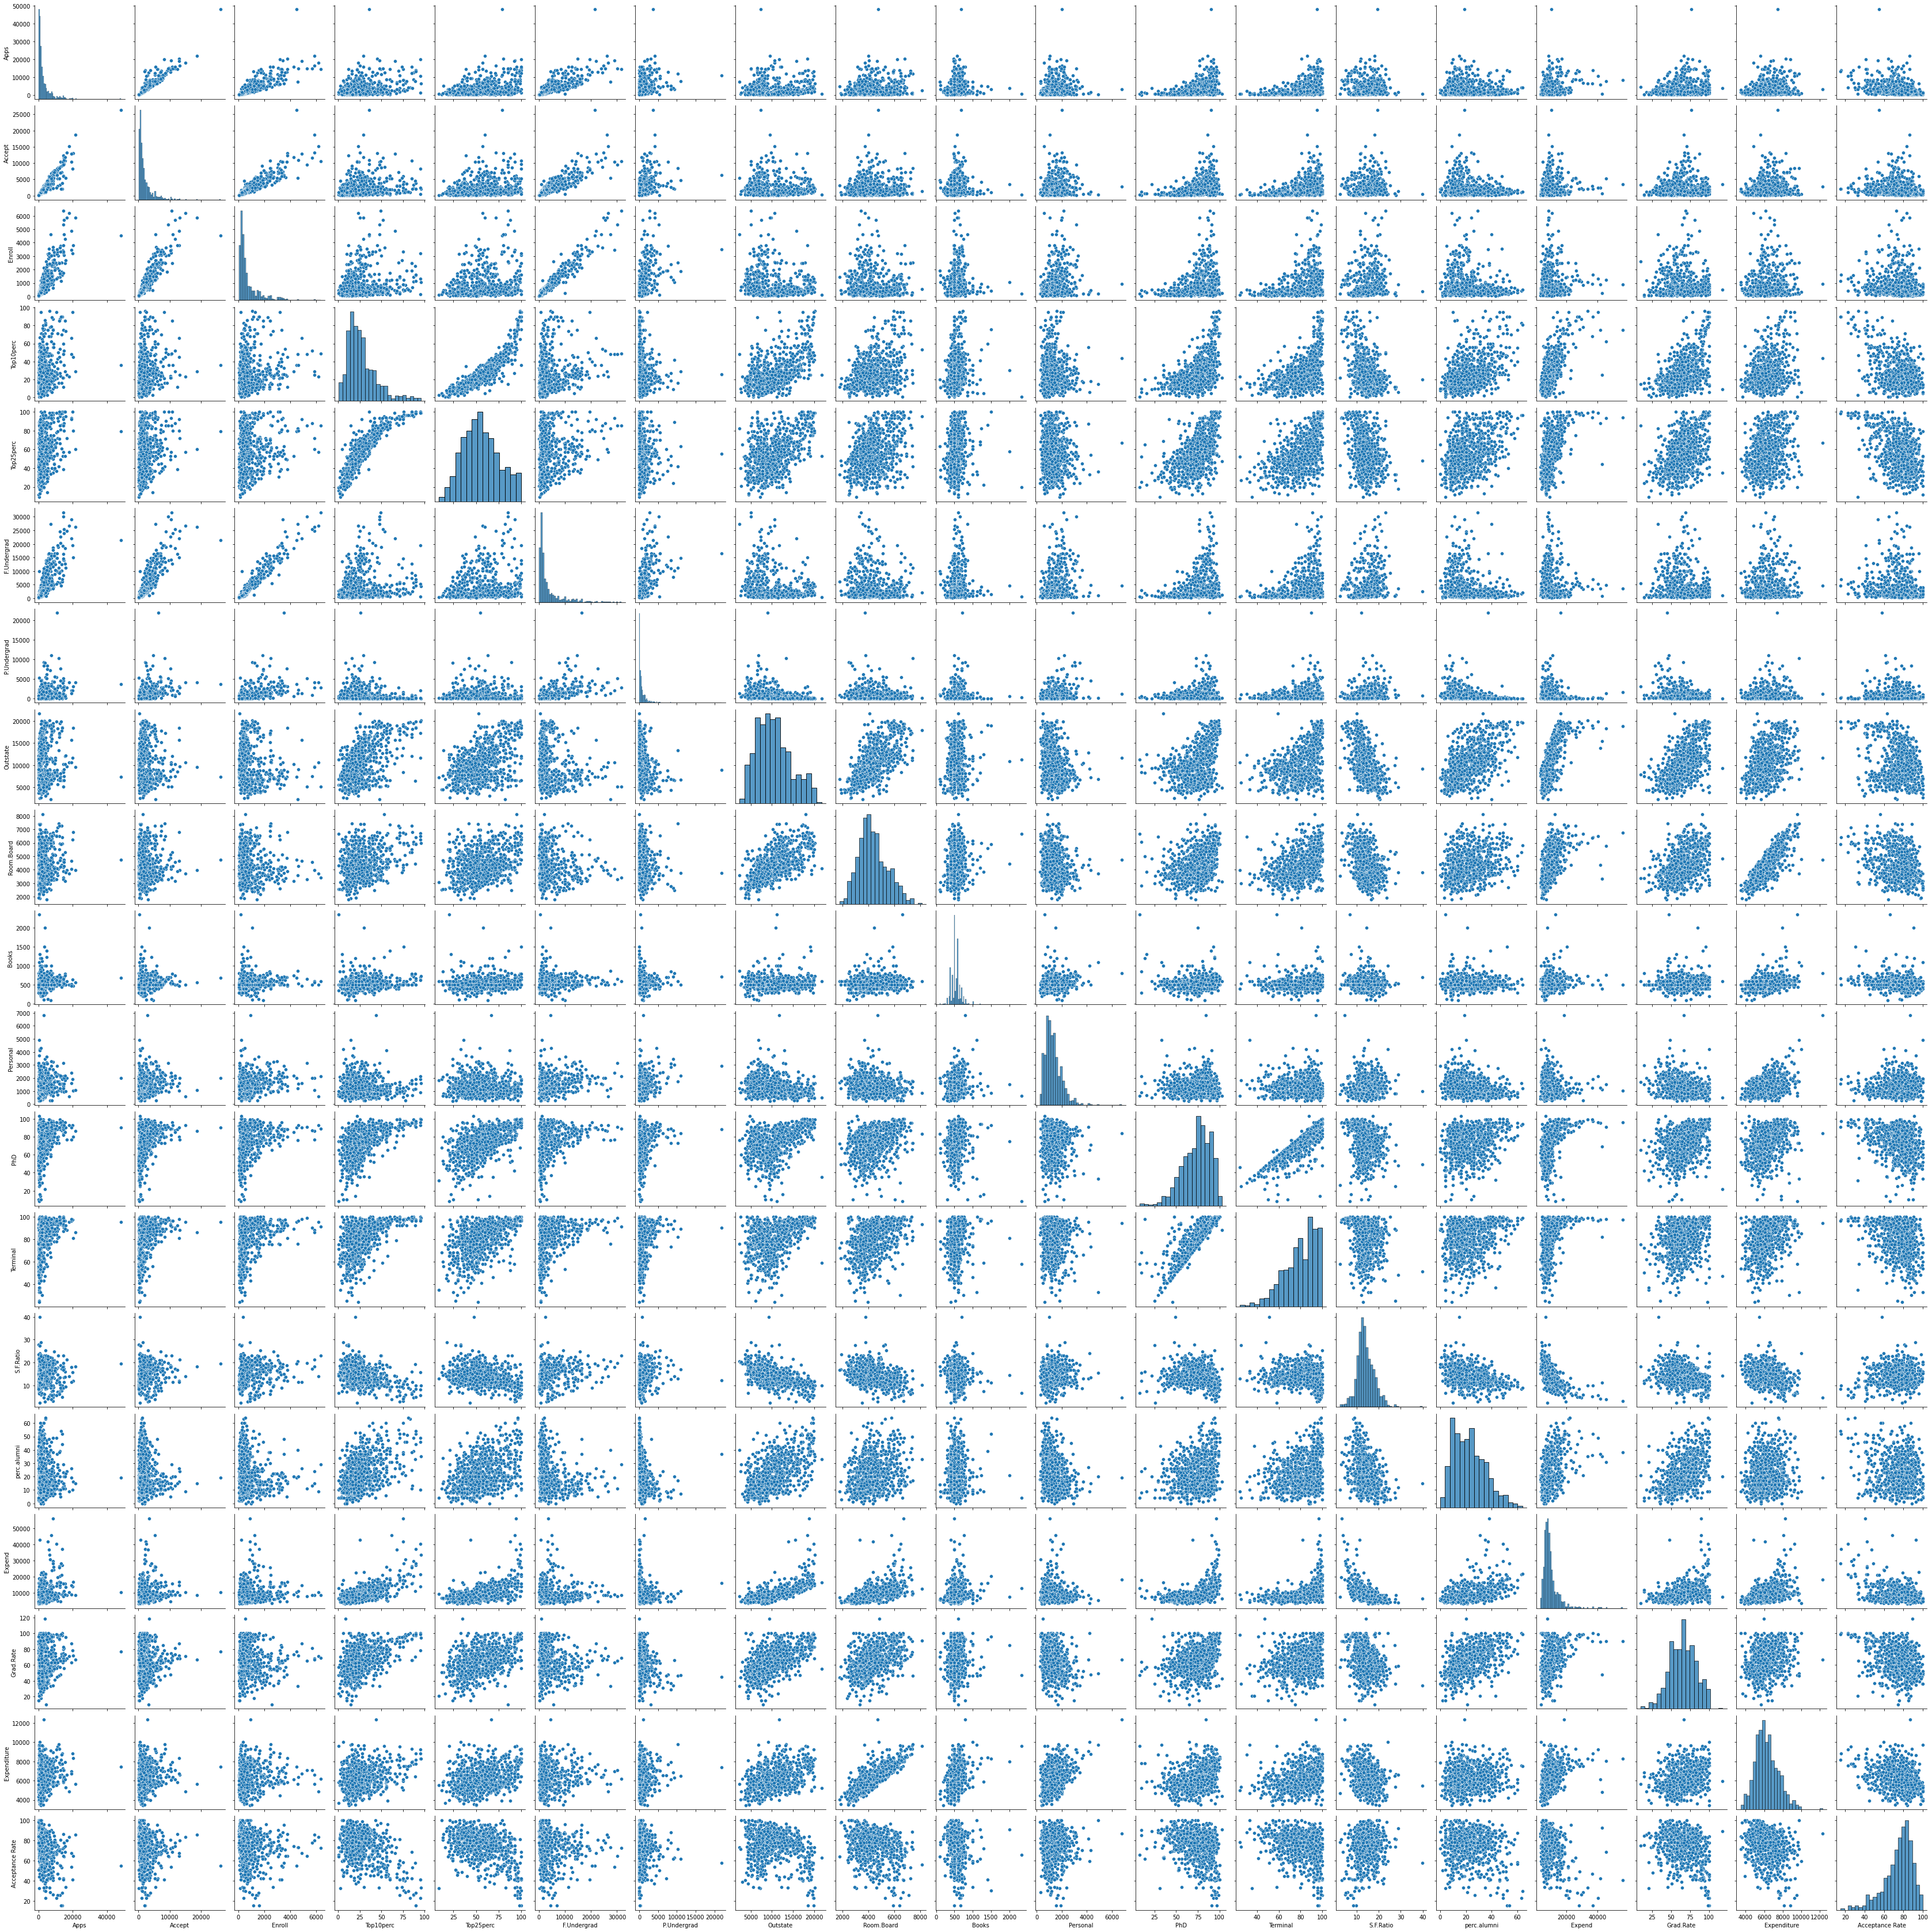

In [19]:
# Pairplot
plt.figure(figsize = (20,15))
sns.pairplot(df);

<AxesSubplot:>

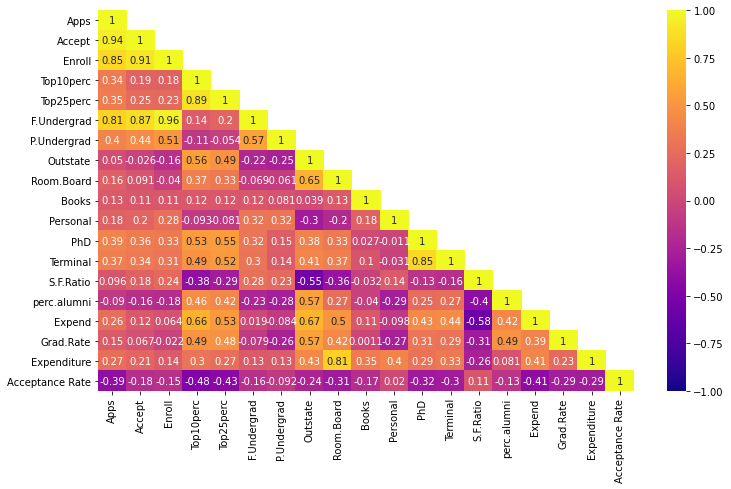

In [20]:
# Heat map
mask = np.array(df.corr())
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(12,7))
sns.heatmap(df.corr(), mask = mask, annot = True, cmap='plasma', vmin=-1, vmax=1)

 From the heatmap we can observe that following columns hold a significantly strong relationship:-
- 1. Accept and Apps : .94
- 2. Enroll and Apps : .85
- 3. Enroll and Accept: .91
- 4. F.Undergrad and Apps: .81
- 5. F.Undergrad and Accept: .87
- 6. F.Undergrad and Enroll: .96


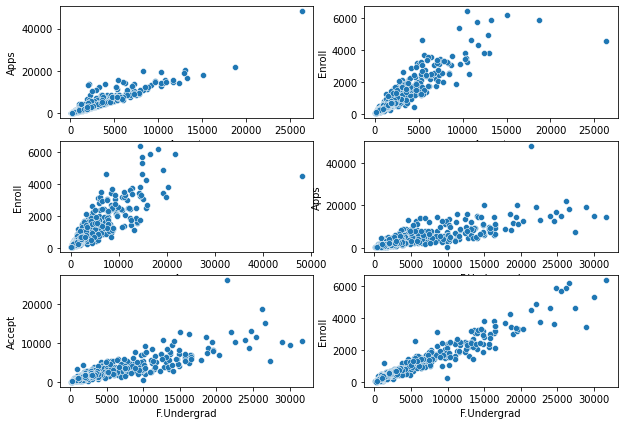

In [21]:
plt.figure(figsize = (10,7))
plt.subplot(3,2,1)
sns.scatterplot(x = df.Accept,y = df.Apps);
plt.subplot(3,2,2)
sns.scatterplot(x=df.Accept,y=df.Enroll);
plt.subplot(3,2,3)
sns.scatterplot(x=df.Apps, y=df.Enroll);
plt.subplot(3,2,4)
sns.scatterplot(x=df['F.Undergrad'],y=df.Apps);
plt.subplot(3,2,5)
sns.scatterplot(x=df['F.Undergrad'],y=df.Accept);
plt.subplot(3,2,6)
sns.scatterplot(x=df['F.Undergrad'],y=df['Enroll']);

- We need to keep in mind these are not cause effect reationships

### Bivariate Analysis

#### Universities with Max and Min applications

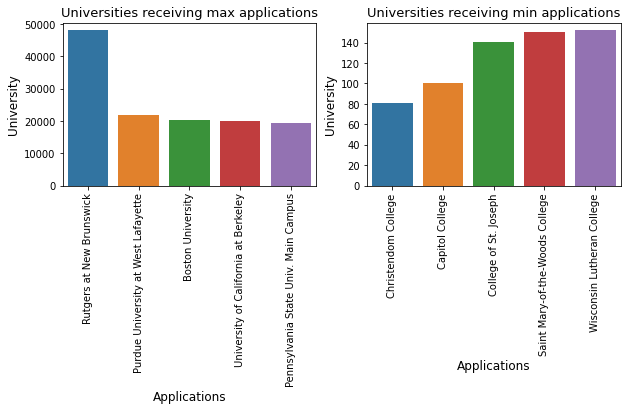

In [25]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.barplot(x='Names',y='Apps',data=df.sort_values(by='Apps',ascending = False).head(5),orient='v')
plt.ylabel('University',fontsize= 12)
plt.xlabel('Applications',fontsize=12)
plt.xticks(rotation = 90)
plt.title('Universities receiving max applications',fontsize = 13)
plt.subplot(1,2,2)
sns.barplot(x='Names',y='Apps',data=df.sort_values(by='Apps',ascending = True).head(5),orient = 'v')
plt.ylabel('University',fontsize= 12)
plt.xlabel('Applications',fontsize=12)
plt.xticks(rotation = 90)
plt.title('Universities receiving min applications',fontsize = 13)
plt.show()

Text(0.5, 1.0, 'Universities with min acceptance rate')

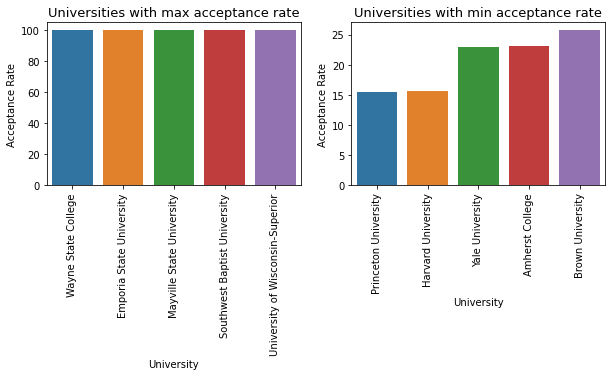

In [26]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.barplot(x='Names',y='Acceptance Rate',data=df.sort_values(by='Acceptance Rate',ascending = False).head(5))
plt.xticks(rotation = 90);
plt.xlabel('University',fontsize= 10)
plt.ylabel('Acceptance Rate',fontsize=10)
plt.title('Universities with max acceptance rate',fontsize = 13)
plt.subplot(1,2,2)
sns.barplot(x='Names',y='Acceptance Rate',data=df.sort_values(by='Acceptance Rate',ascending = True).head(5))
plt.xticks(rotation = 90);
plt.xlabel('University',fontsize= 10)
plt.ylabel('Acceptance Rate',fontsize=10)
plt.title('Universities with min acceptance rate',fontsize = 13)

#### Observing the trend for max 10% students

Text(0.5, 1.0, 'No of new students from Top 10 percent High sec class')

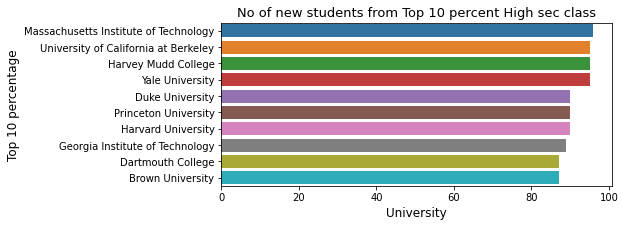

In [27]:
plt.figure(figsize = (7,3))
sns.barplot(y='Names',x='Top10perc',data = df.sort_values(by='Top10perc',ascending = False).head(10),orient = 'h');
plt.xlabel('University',fontsize = 12)
plt.ylabel('Top 10 percentage',fontsize = 12)
plt.title('No of new students from Top 10 percent High sec class',fontsize = 13)

#### Expenditure trend: Room + Books + Personal

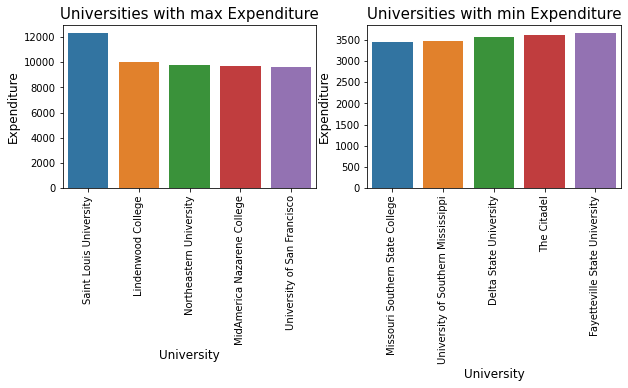

In [28]:
plt.figure(figsize = (10,3))
plt.subplot(1,2,1)
sns.barplot(x='Names',y='Expenditure',data=df.sort_values(by='Expenditure',ascending = False).head(5))
plt.xticks(rotation = 90);
plt.xlabel('University',fontsize= 12)
plt.ylabel('Expenditure',fontsize=12)
plt.title('Universities with max Expenditure',fontsize = 15)
plt.subplot(1,2,2)
sns.barplot(x='Names',y='Expenditure',data=df.sort_values(by='Expenditure',ascending = True).head(5))
plt.xticks(rotation = 90);
plt.xlabel('University',fontsize= 12)
plt.ylabel('Expenditure',fontsize=12)
plt.title('Universities with min Expenditure',fontsize = 15);


#### Universitiies with max max Phd faculties

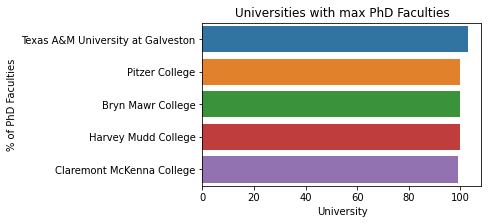

In [29]:
plt.figure(figsize = (5,3))
sns.barplot(y = 'Names',x = 'PhD',data = df.sort_values(by = 'PhD',ascending = False).head(5),orient = 'h');
plt.xlabel('University',fontsize = 10)
plt.ylabel('% of PhD Faculties',fontsize = 10)
plt.title('Universities with max PhD Faculties',fontsize = 12);

#### Universities with max graduation rate

In [30]:
print('Max Grad Rate = ',df['Grad.Rate'].max())

Max Grad Rate =  118


- Grad rate can;t be more than 100, we need to treat this

In [31]:
df.sort_values(by = 'Grad.Rate',ascending = False)[['Grad.Rate','Names']].head()

Grad.Rate                   Names
95         118       Cazenovia College
668        100  University of Richmond
16         100         Amherst College
238        100      Grove City College
250        100      Harvard University

In [32]:
df['Grad.Rate'].replace(118,100,inplace = True)

In [33]:
df.sort_values(by = 'Grad.Rate',ascending = False)[['Grad.Rate','Names']].head()

Grad.Rate                   Names
668        100  University of Richmond
16         100         Amherst College
238        100      Grove City College
250        100      Harvard University
251        100     Harvey Mudd College

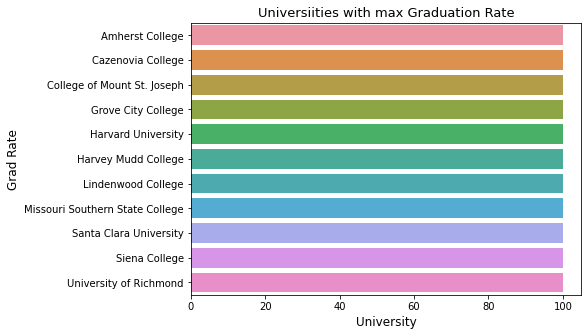

In [34]:
plt.figure(figsize = (7,5))
sns.barplot(y='Names',x='Grad.Rate',data = df[df['Grad.Rate']==100],orient = 'h')
plt.xlabel('University',fontsize = 12)
plt.ylabel('Grad Rate',fontsize = 12 )
plt.title('Universiities with max Graduation Rate',fontsize = 13);

#### Universities with max and min instructional expenditure

Text(0.5, 1.0, 'Max Instructional Expenditure Trend')

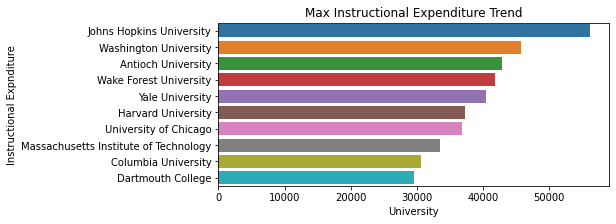

In [35]:
plt.figure(figsize = (7,3))
sns.barplot(y='Names',x='Expend',data=df.sort_values(by='Expend',ascending = False).head(10),orient = 'h')
plt.xlabel('University',fontsize = 10)
plt.ylabel('Instructional Expnditure',fontsize = 10)
plt.title('Max Instructional Expenditure Trend',fontsize = 12)

#### Part time and Full time trend

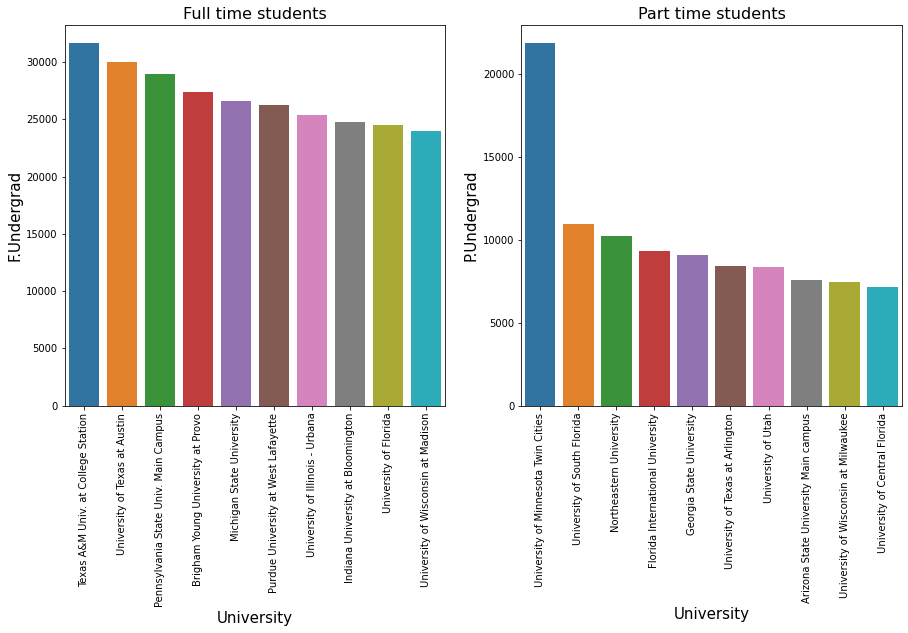

In [36]:
plt.figure(figsize = (15,7))
plt.subplot(1,2,1)
sns.barplot(x='Names',y='F.Undergrad',data = df.sort_values(by = 'F.Undergrad',ascending = False).head(10))
plt.title('Full time students',fontsize = 16)
plt.xticks(rotation = 90);
plt.xlabel('University',fontsize = 15)
plt.ylabel('F.Undergrad',fontsize = 15)
plt.subplot(1,2,2)
sns.barplot(x='Names',y='P.Undergrad',data = df.sort_values(by = 'P.Undergrad',ascending = False).head(10))
plt.xticks(rotation = 90);
plt.xlabel('University',fontsize = 15)
plt.ylabel('P.Undergrad',fontsize = 15)
plt.title('Part time students',fontsize = 16);


#### Student Faculty Trend

Text(0.5, 1.0, 'S/F trend(MIN)')

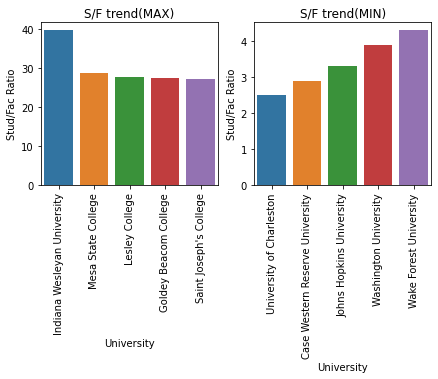

In [37]:
plt.figure(figsize = (7,3))

plt.subplot(1,2,1)
sns.barplot(x='Names',y='S.F.Ratio',data = df.sort_values(by = 'S.F.Ratio',ascending = False).head(5))
plt.xlabel('University',fontsize = 10)
plt.ylabel('Stud/Fac Ratio',fontsize = 10)
plt.xticks(rotation = 90);
plt.title('S/F trend(MAX)',fontsize = 12)

plt.subplot(1,2,2)
sns.barplot(x='Names',y='S.F.Ratio',data = df.sort_values(by = 'S.F.Ratio',ascending = True).head(5))
plt.xlabel('University',fontsize = 10)
plt.ylabel('Stud/Fac Ratio',fontsize = 10)
plt.xticks(rotation = 90);
plt.title('S/F trend(MIN)',fontsize = 12)

#### Terminal degree

Text(0.5, 1.0, 'Terminal degree')

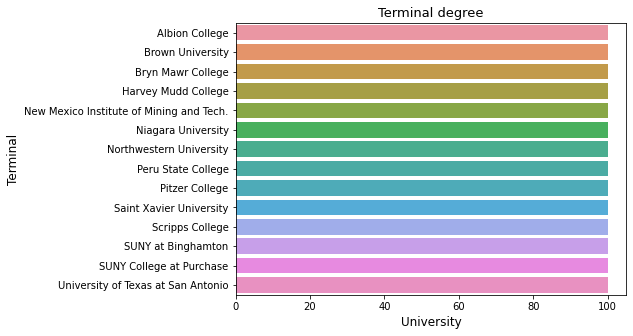

In [38]:
plt.figure(figsize = (7,5))
sns.barplot(y='Names',x='Terminal',data = df[df['Terminal']==100],orient = 'h')
plt.xlabel('University',fontsize = 12)
plt.ylabel('Terminal',fontsize = 12)
plt.title('Terminal degree',fontsize = 13)

# 2.2) Scale the variables and write the inference for using the type of scaling function for this case study.

#### Creating a dataframe without the column Names for Scaling Purposes

In [39]:
df1 = df.drop('Names',axis = 1)

#### As observed from the univariate analysis, all the columns have outliers, except Top25 perc

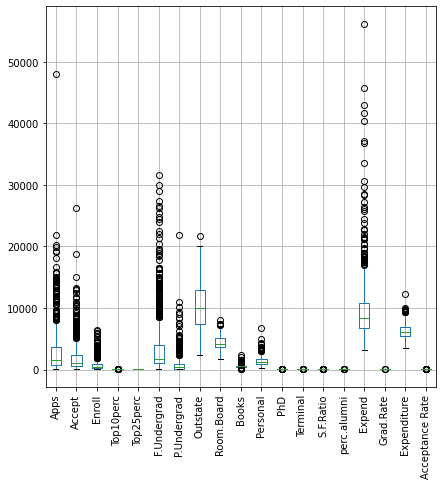

In [41]:
df1.boxplot(figsize = (7,7));
plt.xticks(rotation = 90);

- At this point deleting outliers would not yield best result.
- Also a major chunk of data is in the outlier range

#### Using zscore for standard scaling

In [42]:
from scipy.stats import zscore

#### Checking distribution of original data

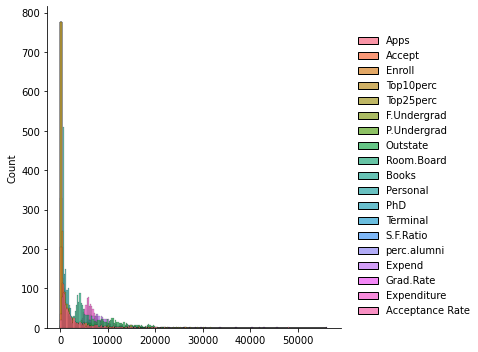

In [43]:
sns.displot(df1);

In [44]:
df_new = df1.apply(zscore)

#### Checking distribution of Scaled data

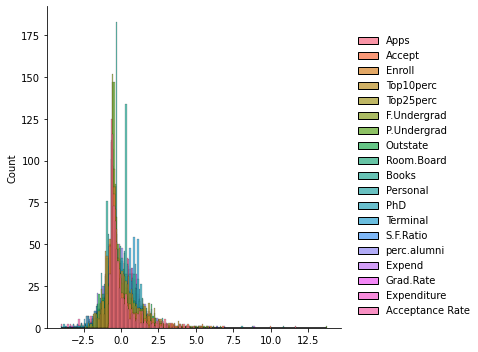

In [45]:
sns.displot(df_new);

#### Checking Outliers in the scaled data

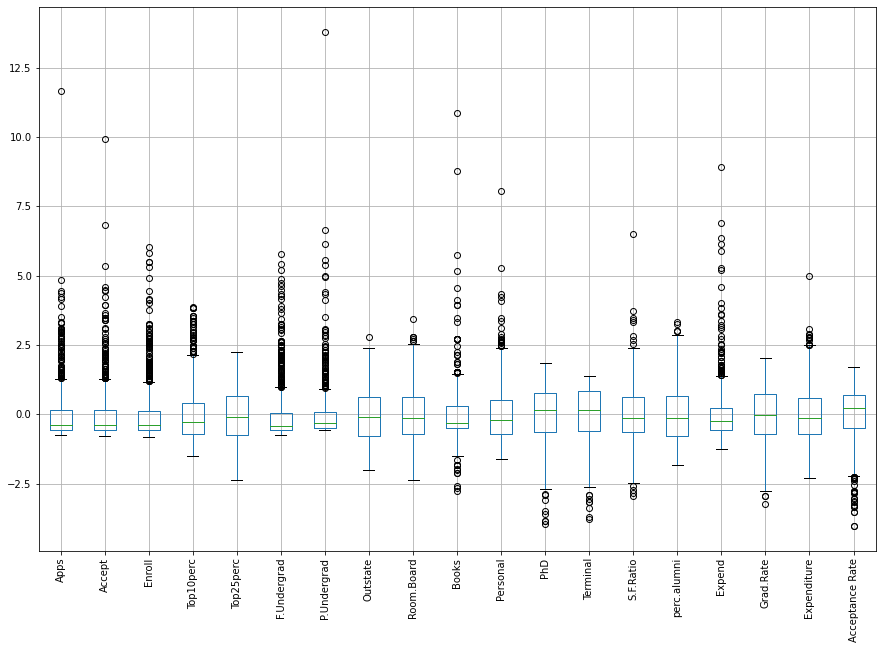

In [107]:
df_new.boxplot(figsize = (15,10))
plt.xticks(rotation = 90);

- After scaling we can very well observe that compared to the previous one, the values are on a common scale now
- Previously they were way too satterred in terms of scaling
- Now comparisons can be made in the sense comparing apples to apples
- Scaling used : Z scaling
- Z scaling comapres everything with the central value, or in other words compared everything with the mean
- Formula: (X-Xbar)/(Sigma)


In [47]:
df_new.describe().T

count          mean       std       min       25%       50%  \
Apps             777.0  6.355797e-17  1.000644 -0.755134 -0.575441 -0.373254   
Accept           777.0  6.774575e-17  1.000644 -0.794764 -0.577581 -0.371011   
Enroll           777.0 -5.249269e-17  1.000644 -0.802273 -0.579351 -0.372584   
Top10perc        777.0 -2.753232e-17  1.000644 -1.506526 -0.712380 -0.258583   
Top25perc        777.0 -1.546739e-16  1.000644 -2.364419 -0.747607 -0.090777   
F.Undergrad      777.0 -1.661405e-16  1.000644 -0.734617 -0.558643 -0.411138   
P.Undergrad      777.0 -3.029180e-17  1.000644 -0.561502 -0.499719 -0.330144   
Outstate         777.0  6.515595e-17  1.000644 -2.014878 -0.776203 -0.112095   
Room.Board       777.0  3.570717e-16  1.000644 -2.351778 -0.693917 -0.143730   
Books            777.0 -2.192583e-16  1.000644 -2.747779 -0.481099 -0.299280   
Personal         777.0  4.765243e-17  1.000644 -1.611860 -0.725120 -0.207855   
PhD              777.0  5.954768e-17  1.000644 -3.962596 -0.653295  0.143389   
Terminal         777.0 -4.481615e-16  1.000644 -3.785982 -0.591502  0.156142   
S.F.Ratio        777.0 -2.057556e-17  1.000644 -2.929799 -0.654660 -0.123794   
perc.alumni      777.0 -6.022638e-17  1.000644 -1.836580 -0.786824 -0.140820   
Expend           777.0  1.213101e-16  1.000644 -1.240641 -0.557483 -0.245893   
Grad.Rate        777.0 -2.091849e-16  1.000644 -3.240639 -0.727163 -0.025728   
Expenditure      777.0 -1.047353e-16  1.000644 -2.300428 -0.697439 -0.121417   
Acceptance Rate  777.0 -3.675024e-16  1.000644 -4.029961 -0.484869  0.216465   

                      75%        max  
Apps             0.160912  11.658671  
Accept           0.165417   9.924816  
Enroll           0.131413   6.043678  
Top10perc        0.422113   3.882319  
Top25perc        0.667104   2.233391  
F.Undergrad      0.062941   5.764674  
P.Undergrad      0.073418  13.789921  
Outstate         0.617927   2.800531  
Room.Board       0.631824   3.436593  
Books            0.306784  10.852297  
Personal         0.531095   8.068387  
PhD              0.756222   1.859323  
Terminal         0.835818   1.379560  
S.F.Ratio        0.609307   6.499390  
perc.alumni      0.666685   3.331452  
Expend           0.224174   8.924721  
Grad.Rate        0.734160   2.020124  
Expenditure      0.584622   5.005183  
Acceptance Rate  0.691075   1.721472

- As can be observed, the mean is 0 and standard deviation is 1

#### MinMax Scaler

In [48]:
from sklearn.preprocessing import MinMaxScaler
minmax_scale = MinMaxScaler()

In [49]:
df2 = df.drop('Names',axis = 1)

In [50]:
df2 = minmax_scale.fit_transform(df2)

In [51]:
df2 = pd.DataFrame(df2, columns = df.select_dtypes(include=['float64','int64']).columns)

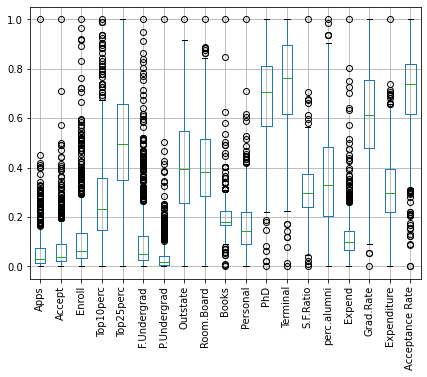

In [52]:
df2.boxplot(figsize = (7,5));
plt.xticks(rotation = 90);

- The min max scaler scales the values between 0 and 1

#### Checking distribution of data scaled on min_max scaling

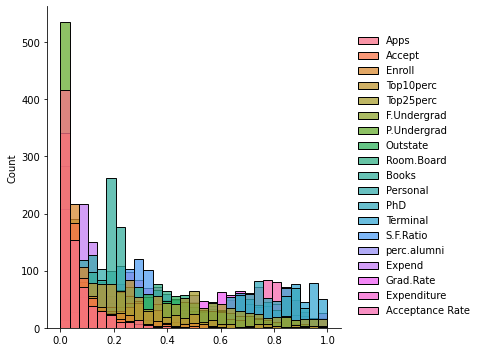

In [53]:
sns.displot(df2);

In [54]:
df2.describe().T

count      mean       std  min       25%       50%       75%  \
Apps             777.0  0.060830  0.080607  0.0  0.014475  0.030763  0.073793   
Accept           777.0  0.074141  0.093347  0.0  0.020260  0.039531  0.089573   
Enroll           777.0  0.117189  0.146166  0.0  0.032563  0.062765  0.136385   
Top10perc        777.0  0.279564  0.185688  0.0  0.147368  0.231579  0.357895   
Top25perc        777.0  0.514249  0.217635  0.0  0.351648  0.494505  0.659341   
F.Undergrad      777.0  0.113030  0.153962  0.0  0.027076  0.049771  0.122715   
P.Undergrad      777.0  0.039125  0.069724  0.0  0.004305  0.016121  0.044241   
Outstate         777.0  0.418423  0.207800  0.0  0.257231  0.395145  0.546746   
Room.Board       777.0  0.406294  0.172871  0.0  0.286412  0.381463  0.515448   
Books            777.0  0.202041  0.073576  0.0  0.166667  0.180036  0.224599   
Personal         777.0  0.166510  0.103370  0.0  0.091603  0.145038  0.221374   
PhD              777.0  0.680634  0.171875  0.0  0.568421  0.705263  0.810526   
Terminal         777.0  0.732930  0.193715  0.0  0.618421  0.763158  0.894737   
S.F.Ratio        777.0  0.310716  0.106122  0.0  0.241287  0.297587  0.375335   
perc.alumni      777.0  0.355373  0.193622  0.0  0.203125  0.328125  0.484375   
Expend           777.0  0.122046  0.098437  0.0  0.067205  0.097857  0.144099   
Grad.Rate        777.0  0.616002  0.190209  0.0  0.477778  0.611111  0.755556   
Expenditure      777.0  0.314885  0.136969  0.0  0.219419  0.298265  0.394909   
Acceptance Rate  777.0  0.700688  0.173982  0.0  0.616384  0.738325  0.820845   

                 max  
Apps             1.0  
Accept           1.0  
Enroll           1.0  
Top10perc        1.0  
Top25perc        1.0  
F.Undergrad      1.0  
P.Undergrad      1.0  
Outstate         1.0  
Room.Board       1.0  
Books            1.0  
Personal         1.0  
PhD              1.0  
Terminal         1.0  
S.F.Ratio        1.0  
perc.alumni      1.0  
Expend           1.0  
Grad.Rate        1.0  
Expenditure      1.0  
Acceptance Rate  1.0

# 2.3) Comment on the comparison between covariance and the correlation matrix after scaling.

- Lets have a look at the original data and scaled data first

In [55]:
df.head()

Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Expenditure  \
0        78       18.1           12    7041         60         5950   
1        30       12.2           16   10527         56         8700   
2        66       12.9           30    8735         54         5315   
3        97        7.7           37   19016         59         6775   
4        72       11.9            2   10922         15         6420   

   Acceptance Rate  
0        74.216867  
1        88.014639  
2        76.820728  
3        83.693046  
4        75.647668

#### - Z scaled

In [56]:
df_new.head()

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  Expenditure  Acceptance Rate  
0   1.013776    -0.867574 -0.501910  -0.317993    -0.244850        -0.032372  
1  -0.477704    -0.544572  0.166110  -0.551805     2.018095         0.906193  
2  -0.300749     0.585935 -0.177290  -0.668710    -0.767385         0.144750  
3  -1.615274     1.151188  1.792851  -0.376446     0.434033         0.612225  
4  -0.553542    -1.675079  0.241803  -2.948375     0.141908         0.064955

#### - Covariance Matrix Original Data

In [57]:
cov_orig = df.cov()
cov_orig

Apps        Accept        Enroll     Top10perc  \
Apps             1.497846e+07  8.949860e+06  3.045256e+06  23132.773138   
Accept           8.949860e+06  6.007960e+06  2.076268e+06   8321.124872   
Enroll           3.045256e+06  2.076268e+06  8.633684e+05   2971.583415   
Top10perc        2.313277e+04  8.321125e+03  2.971583e+03    311.182456   
Top25perc        2.695266e+04  1.201340e+04  4.172592e+03    311.630480   
F.Undergrad      1.528970e+07  1.039358e+07  4.347530e+06  12089.113681   
P.Undergrad      2.346620e+06  1.646670e+06  7.257907e+05  -2829.474981   
Outstate         7.809704e+05 -2.539623e+05 -5.811885e+05  39907.179832   
Room.Board       7.000729e+05  2.443471e+05 -4.099706e+04   7186.705605   
Books            8.470375e+04  4.594281e+04  1.729120e+04    346.177405   
Personal         4.683468e+05  3.335566e+05  1.767380e+05  -1114.551186   
PhD              2.468943e+04  1.423820e+04  5.028961e+03    153.184870   
Terminal         2.105307e+04  1.218209e+04  4.217086e+03    127.551581   
S.F.Ratio        1.465061e+03  1.709838e+03  8.726848e+02    -26.874525   
perc.alumni     -4.327122e+03 -4.859487e+03 -2.081694e+03     99.567208   
Expend           5.246171e+06  1.596272e+06  3.113454e+05  60879.310196   
Grad.Rate        9.736813e+03  2.801359e+03 -3.507200e+02    150.422646   
Expenditure      1.253123e+06  6.238466e+05  1.530321e+05   6418.331824   
Acceptance Rate -2.234901e+04 -6.317014e+03 -2.080000e+03   -124.214672   

                    Top25perc   F.Undergrad   P.Undergrad      Outstate  \
Apps             26952.663479  1.528970e+07  2.346620e+06  7.809704e+05   
Accept           12013.404757  1.039358e+07  1.646670e+06 -2.539623e+05   
Enroll            4172.592435  4.347530e+06  7.257907e+05 -5.811885e+05   
Top10perc          311.630480  1.208911e+04 -2.829475e+03  3.990718e+04   
Top25perc          392.229216  1.915895e+04 -1.615412e+03  3.899243e+04   
F.Undergrad      19158.952782  2.352658e+07  4.212910e+06 -4.209843e+06   
P.Undergrad      -1615.412144  4.212910e+06  2.317799e+06 -1.552704e+06   
Outstate         38992.427500 -4.209843e+06 -1.552704e+06  1.618466e+07   
Room.Board        7199.903568 -3.664582e+05 -1.023919e+05  2.886597e+06   
Books              377.759266  9.253576e+04  2.041045e+04  2.580824e+04   
Personal         -1083.605065  1.041709e+06  3.297324e+05 -8.146737e+05   
PhD                176.518449  2.521178e+04  3.706756e+03  2.515752e+04   
Terminal           153.002612  2.142424e+04  3.180597e+03  2.416415e+04   
S.F.Ratio          -23.097199  5.370209e+03  1.401303e+03 -8.835254e+03   
perc.alumni        102.550946 -1.379193e+04 -5.297337e+03  2.822955e+04   
Expend           54546.483305  4.724040e+05 -6.643512e+05  1.413324e+07   
Grad.Rate          162.853794 -6.500913e+03 -6.701501e+03  3.950419e+04   
Expenditure       6494.057769  7.677866e+05  2.477510e+05  2.097732e+06   
Acceptance Rate   -126.635749 -1.110614e+04 -2.066812e+03 -1.425950e+04   

                   Room.Board         Books      Personal           PhD  \
Apps             7.000729e+05  84703.752639  4.683468e+05  24689.433666   
Accept           2.443471e+05  45942.807867  3.335566e+05  14238.201489   
Enroll          -4.099706e+04  17291.199742  1.767380e+05   5028.961166   
Top10perc        7.186706e+03    346.177405 -1.114551e+03    153.184870   
Top25perc        7.199904e+03    377.759266 -1.083605e+03    176.518449   
F.Undergrad     -3.664582e+05  92535.764728  1.041709e+06  25211.784197   
P.Undergrad     -1.023919e+05  20410.446674  3.297324e+05   3706.756219   
Outstate         2.886597e+06  25808.242145 -8.146737e+05  25157.515051   
Room.Board       1.202743e+06  23170.313390 -1.480838e+05   5895.034749   
Books            2.317031e+04  27259.779946  2.004303e+04     72.534242   
Personal        -1.480838e+05  20043.025650  4.584258e+05   -120.898783   
PhD              5.895035e+03     72.534242 -1.208988e+02    266.608636   
Terminal         6.047300e+03    242.963918 -3.0

#### Corelation matrix for Original Data

In [58]:
corr_orig = df.corr()
corr_orig

Apps    Accept    Enroll  Top10perc  Top25perc  \
Apps             1.000000  0.943451  0.846822   0.338834   0.351640   
Accept           0.943451  1.000000  0.911637   0.192447   0.247476   
Enroll           0.846822  0.911637  1.000000   0.181294   0.226745   
Top10perc        0.338834  0.192447  0.181294   1.000000   0.891995   
Top25perc        0.351640  0.247476  0.226745   0.891995   1.000000   
F.Undergrad      0.814491  0.874223  0.964640   0.141289   0.199445   
P.Undergrad      0.398264  0.441271  0.513069  -0.105356  -0.053577   
Outstate         0.050159 -0.025755 -0.155477   0.562331   0.489394   
Room.Board       0.164939  0.090899 -0.040232   0.371480   0.331490   
Books            0.132559  0.113525  0.112711   0.118858   0.115527   
Personal         0.178731  0.200989  0.280929  -0.093316  -0.080810   
PhD              0.390697  0.355758  0.331469   0.531828   0.545862   
Terminal         0.369491  0.337583  0.308274   0.491135   0.524749   
S.F.Ratio        0.095633  0.176229  0.237271  -0.384875  -0.294629   
perc.alumni     -0.090226 -0.159990 -0.180794   0.455485   0.417864   
Expend           0.259592  0.124717  0.064169   0.660913   0.527447   
Grad.Rate        0.146964  0.066762 -0.022049   0.498118   0.480346   
Expenditure      0.266270  0.209303  0.135440   0.299210   0.269655   
Acceptance Rate -0.392555 -0.175196 -0.152174  -0.478675  -0.434672   

                 F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Apps                0.814491     0.398264  0.050159    0.164939  0.132559   
Accept              0.874223     0.441271 -0.025755    0.090899  0.113525   
Enroll              0.964640     0.513069 -0.155477   -0.040232  0.112711   
Top10perc           0.141289    -0.105356  0.562331    0.371480  0.118858   
Top25perc           0.199445    -0.053577  0.489394    0.331490  0.115527   
F.Undergrad         1.000000     0.570512 -0.215742   -0.068890  0.115550   
P.Undergrad         0.570512     1.000000 -0.253512   -0.061326  0.081200   
Outstate           -0.215742    -0.253512  1.000000    0.654256  0.038855   
Room.Board         -0.068890    -0.061326  0.654256    1.000000  0.127963   
Books               0.115550     0.081200  0.038855    0.127963  1.000000   
Personal            0.317200     0.319882 -0.299087   -0.199428  0.179295   
PhD                 0.318337     0.149114  0.382982    0.329202  0.026906   
Terminal            0.300019     0.141904  0.407983    0.374540  0.099955   
S.F.Ratio           0.279703     0.232531 -0.554821   -0.362628 -0.031929   
perc.alumni        -0.229462    -0.280792  0.566262    0.272363 -0.040208   
Expend              0.018652    -0.083568  0.672779    0.501739  0.112409   
Grad.Rate          -0.078293    -0.257135  0.573612    0.425808  0.000649   
Expenditure         0.130174     0.133826  0.428805    0.808212  0.351014   
Acceptance Rate    -0.155654    -0.092287 -0.240951   -0.310302 -0.174073   

                 Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
Apps             0.178731  0.390697  0.369491   0.095633    -0.090226   
Accept           0.200989  0.355758  0.337583   0.176229    -0.159990   
Enroll           0.280929  0.331469  0.308274   0.237271    -0.180794   
Top10perc       -0.093316  0.531828  0.491135  -0.384875     0.455485   
Top25perc       -0.080810  0.545862  0.524749  -0.294629     0.417864   
F.Undergrad      0.317200  0.318337  0.300019   0.279703    -0.229462   
P.Undergrad      0.319882  0.149114  0.141904   0.232531    -0.280792   
Outstate        -0.299087  0.382982  0.407983  -0.554821     0.566262   
Room.Board      -0.199428  0.329202  0.374540  -0.362628     0.272363   
Books            0.179295  0.026906  0.099955  -0.031929    -0.040208   
Personal         1.000000 -0.010936 -0.030613   0.136345    -0.285968   
PhD             -0.010936  1.000000  0.849587  -0.130530     0.249009   
Terminal        -0.030613  0.849587  1.000000  -0.160104     0.267130   
S.F.Ratio        0.136345 -0.130530 -

- The covariance matrix for the original data gives the sense of direction, how are the two entities related.
- The corelation matrix yeilds the strength between the two entities(scaled bw 0 to 1)

#### Corelation and covariance for new data

In [59]:
cov_new = df_new.cov()
cov_new

Apps    Accept    Enroll  Top10perc  Top25perc  \
Apps             1.001289  0.944666  0.847913   0.339270   0.352093   
Accept           0.944666  1.001289  0.912811   0.192695   0.247795   
Enroll           0.847913  0.912811  1.001289   0.181527   0.227037   
Top10perc        0.339270  0.192695  0.181527   1.001289   0.893144   
Top25perc        0.352093  0.247795  0.227037   0.893144   1.001289   
F.Undergrad      0.815540  0.875350  0.965883   0.141471   0.199702   
P.Undergrad      0.398777  0.441839  0.513730  -0.105492  -0.053646   
Outstate         0.050224 -0.025788 -0.155678   0.563055   0.490024   
Room.Board       0.165152  0.091016 -0.040284   0.371959   0.331917   
Books            0.132729  0.113672  0.112856   0.119012   0.115676   
Personal         0.178961  0.201248  0.281291  -0.093437  -0.080914   
PhD              0.391201  0.356216  0.331896   0.532513   0.546566   
Terminal         0.369968  0.338018  0.308671   0.491768   0.525425   
S.F.Ratio        0.095756  0.176456  0.237577  -0.385370  -0.295009   
perc.alumni     -0.090342 -0.160196 -0.181027   0.456072   0.418403   
Expend           0.259927  0.124878  0.064252   0.661765   0.528127   
Grad.Rate        0.147153  0.066848 -0.022077   0.498760   0.480965   
Expenditure      0.266613  0.209573  0.135614   0.299596   0.270002   
Acceptance Rate -0.393061 -0.175422 -0.152370  -0.479292  -0.435233   

                 F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Apps                0.815540     0.398777  0.050224    0.165152  0.132729   
Accept              0.875350     0.441839 -0.025788    0.091016  0.113672   
Enroll              0.965883     0.513730 -0.155678   -0.040284  0.112856   
Top10perc           0.141471    -0.105492  0.563055    0.371959  0.119012   
Top25perc           0.199702    -0.053646  0.490024    0.331917  0.115676   
F.Undergrad         1.001289     0.571247 -0.216020   -0.068979  0.115699   
P.Undergrad         0.571247     1.001289 -0.253839   -0.061405  0.081304   
Outstate           -0.216020    -0.253839  1.001289    0.655100  0.038905   
Room.Board         -0.068979    -0.061405  0.655100    1.001289  0.128128   
Books               0.115699     0.081304  0.038905    0.128128  1.001289   
Personal            0.317608     0.320294 -0.299472   -0.199685  0.179526   
PhD                 0.318747     0.149306  0.383476    0.329627  0.026940   
Terminal            0.300406     0.142086  0.408509    0.375022  0.100084   
S.F.Ratio           0.280064     0.232830 -0.555536   -0.363095 -0.031970   
perc.alumni        -0.229758    -0.281154  0.566992    0.272714 -0.040260   
Expend              0.018676    -0.083676  0.673646    0.502386  0.112554   
Grad.Rate          -0.078394    -0.257466  0.574351    0.426356  0.000650   
Expenditure         0.130341     0.133998  0.429358    0.809254  0.351466   
Acceptance Rate    -0.155854    -0.092406 -0.241261   -0.310702 -0.174297   

                 Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
Apps             0.178961  0.391201  0.369968   0.095756    -0.090342   
Accept           0.201248  0.356216  0.338018   0.176456    -0.160196   
Enroll           0.281291  0.331896  0.308671   0.237577    -0.181027   
Top10perc       -0.093437  0.532513  0.491768  -0.385370     0.456072   
Top25perc       -0.080914  0.546566  0.525425  -0.295009     0.418403   
F.Undergrad      0.317608  0.318747  0.300406   0.280064    -0.229758   
P.Undergrad      0.320294  0.149306  0.142086   0.232830    -0.281154   
Outstate        -0.299472  0.383476  0.408509  -0.555536     0.566992   
Room.Board      -0.199685  0.329627  0.375022  -0.363095     0.272714   
Books            0.179526  0.026940  0.100084  -0.031970    -0.040260   
Personal         1.001289 -0.010950 -0.030653   0.136521    -0.286337   
PhD             -0.010950  1.001289  0.850682  -0.130698     0.249330   
Terminal        -0.030653  0.850682  1.001289  -0.160310     0.267475   
S.F.Ratio        0.136521 -0.130698 -

In [60]:
corr_new = df_new.corr()
corr_new

Apps    Accept    Enroll  Top10perc  Top25perc  \
Apps             1.000000  0.943451  0.846822   0.338834   0.351640   
Accept           0.943451  1.000000  0.911637   0.192447   0.247476   
Enroll           0.846822  0.911637  1.000000   0.181294   0.226745   
Top10perc        0.338834  0.192447  0.181294   1.000000   0.891995   
Top25perc        0.351640  0.247476  0.226745   0.891995   1.000000   
F.Undergrad      0.814491  0.874223  0.964640   0.141289   0.199445   
P.Undergrad      0.398264  0.441271  0.513069  -0.105356  -0.053577   
Outstate         0.050159 -0.025755 -0.155477   0.562331   0.489394   
Room.Board       0.164939  0.090899 -0.040232   0.371480   0.331490   
Books            0.132559  0.113525  0.112711   0.118858   0.115527   
Personal         0.178731  0.200989  0.280929  -0.093316  -0.080810   
PhD              0.390697  0.355758  0.331469   0.531828   0.545862   
Terminal         0.369491  0.337583  0.308274   0.491135   0.524749   
S.F.Ratio        0.095633  0.176229  0.237271  -0.384875  -0.294629   
perc.alumni     -0.090226 -0.159990 -0.180794   0.455485   0.417864   
Expend           0.259592  0.124717  0.064169   0.660913   0.527447   
Grad.Rate        0.146964  0.066762 -0.022049   0.498118   0.480346   
Expenditure      0.266270  0.209303  0.135440   0.299210   0.269655   
Acceptance Rate -0.392555 -0.175196 -0.152174  -0.478675  -0.434672   

                 F.Undergrad  P.Undergrad  Outstate  Room.Board     Books  \
Apps                0.814491     0.398264  0.050159    0.164939  0.132559   
Accept              0.874223     0.441271 -0.025755    0.090899  0.113525   
Enroll              0.964640     0.513069 -0.155477   -0.040232  0.112711   
Top10perc           0.141289    -0.105356  0.562331    0.371480  0.118858   
Top25perc           0.199445    -0.053577  0.489394    0.331490  0.115527   
F.Undergrad         1.000000     0.570512 -0.215742   -0.068890  0.115550   
P.Undergrad         0.570512     1.000000 -0.253512   -0.061326  0.081200   
Outstate           -0.215742    -0.253512  1.000000    0.654256  0.038855   
Room.Board         -0.068890    -0.061326  0.654256    1.000000  0.127963   
Books               0.115550     0.081200  0.038855    0.127963  1.000000   
Personal            0.317200     0.319882 -0.299087   -0.199428  0.179295   
PhD                 0.318337     0.149114  0.382982    0.329202  0.026906   
Terminal            0.300019     0.141904  0.407983    0.374540  0.099955   
S.F.Ratio           0.279703     0.232531 -0.554821   -0.362628 -0.031929   
perc.alumni        -0.229462    -0.280792  0.566262    0.272363 -0.040208   
Expend              0.018652    -0.083568  0.672779    0.501739  0.112409   
Grad.Rate          -0.078293    -0.257135  0.573612    0.425808  0.000649   
Expenditure         0.130174     0.133826  0.428805    0.808212  0.351014   
Acceptance Rate    -0.155654    -0.092287 -0.240951   -0.310302 -0.174073   

                 Personal       PhD  Terminal  S.F.Ratio  perc.alumni  \
Apps             0.178731  0.390697  0.369491   0.095633    -0.090226   
Accept           0.200989  0.355758  0.337583   0.176229    -0.159990   
Enroll           0.280929  0.331469  0.308274   0.237271    -0.180794   
Top10perc       -0.093316  0.531828  0.491135  -0.384875     0.455485   
Top25perc       -0.080810  0.545862  0.524749  -0.294629     0.417864   
F.Undergrad      0.317200  0.318337  0.300019   0.279703    -0.229462   
P.Undergrad      0.319882  0.149114  0.141904   0.232531    -0.280792   
Outstate        -0.299087  0.382982  0.407983  -0.554821     0.566262   
Room.Board      -0.199428  0.329202  0.374540  -0.362628     0.272363   
Books            0.179295  0.026906  0.099955  -0.031929    -0.040208   
Personal         1.000000 -0.010936 -0.030613   0.136345    -0.285968   
PhD             -0.010936  1.000000  0.849587  -0.130530     0.249009   
Terminal        -0.030613  0.849587  1.000000  -0.160104     0.267130   
S.F.Ratio        0.136345 -0.130530 -

#### Observstions for original data: -
1. Covariance is defined as : COV(x,y) = Summation((Xi-Xbar)/(Yi-Ybar))/n
2. Coefficient of corelation is defined as : COV(x,y)/(sigma(x)* sigma(y))
3. But obvious, these two will be different,and the coefficient of correlation would give the strength between -1 to +1.

#### Observations for scaled data: -
1. The data is scaled as (x-xbar)/sigma(x), the data has mean = 0 and standar deviation as 1.
2. Covariance will be calculated with the denominator already as sigma.
3. Coefficient of correlation will be same as covariance as the standard deviation(sigma) = 1.
4. Hence coefficient of correlation and covariance for the scaled data are equal.
5. Also the coefficient of correlation for original data is same as the coefficient of correlation and covariance for the scaled data

#### Comparing corelation original data and new data

In [77]:
A = (round(corr_orig,2)==round(corr_new,2))
A.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps       True    True    True       True       True         True   
Accept     True    True    True       True       True         True   
Enroll     True    True    True       True       True         True   
Top10perc  True    True    True       True       True         True   
Top25perc  True    True    True       True       True         True   

           P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  Terminal  \
Apps              True      True        True   True      True  True      True   
Accept            True      True        True   True      True  True      True   
Enroll            True      True        True   True      True  True      True   
Top10perc         True      True        True   True      True  True      True   
Top25perc         True      True        True   True      True  True      True   

           S.F.Ratio  perc.alumni  Expend  Grad.Rate  Expenditure  \
Apps            True         True    True       True         True   
Accept          True         True    True       True         True   
Enroll          True         True    True       True         True   
Top10perc       True         True    True       True         True   
Top25perc       True         True    True       True         True   

           Acceptance Rate  
Apps                  True  
Accept                True  
Enroll                True  
Top10perc             True  
Top25perc             True

#### Comparing corelation original and covariance new

In [95]:
B = (round(corr_new,1)==round(cov_new,1))
B.head()

Apps  Accept  Enroll  Top10perc  Top25perc  F.Undergrad  \
Apps       True    True    True       True       True         True   
Accept     True    True    True       True       True         True   
Enroll     True    True    True       True       True         True   
Top10perc  True    True    True       True       True         True   
Top25perc  True    True    True       True       True         True   

           P.Undergrad  Outstate  Room.Board  Books  Personal   PhD  Terminal  \
Apps              True      True        True   True      True  True      True   
Accept            True      True        True   True      True  True      True   
Enroll            True      True        True   True      True  True      True   
Top10perc         True      True        True   True      True  True      True   
Top25perc         True      True        True   True      True  True      True   

           S.F.Ratio  perc.alumni  Expend  Grad.Rate  Expenditure  \
Apps            True         True    True       True         True   
Accept          True         True    True       True         True   
Enroll          True         True    True       True         True   
Top10perc       True         True    True       True         True   
Top25perc       True         True    True       True         True   

           Acceptance Rate  
Apps                  True  
Accept                True  
Enroll                True  
Top10perc             True  
Top25perc             True

In [96]:
np.where(A==False)

(array([], dtype=int64), array([], dtype=int64))

In [97]:
np.where(B==False)

(array([11, 12], dtype=int64), array([12, 11], dtype=int64))

In [100]:
B = (round(corr_new,0)==round(cov_new,0))

In [101]:
np.where(B==False)

(array([], dtype=int64), array([], dtype=int64))

# Q2.4 Check the dataset for outliers before and after scaling. Draw your inferences from this exercise.

In [102]:
print('Original data set')
df.head()

Original data set


Names  Apps  Accept  Enroll  Top10perc  Top25perc  \
0  Abilene Christian University  1660    1232     721         23         52   
1            Adelphi University  2186    1924     512         16         29   
2                Adrian College  1428    1097     336         22         50   
3           Agnes Scott College   417     349     137         60         89   
4     Alaska Pacific University   193     146      55         16         44   

   F.Undergrad  P.Undergrad  Outstate  Room.Board  Books  Personal  PhD  \
0         2885          537      7440        3300    450      2200   70   
1         2683         1227     12280        6450    750      1500   29   
2         1036           99     11250        3750    400      1165   53   
3          510           63     12960        5450    450       875   92   
4          249          869      7560        4120    800      1500   76   

   Terminal  S.F.Ratio  perc.alumni  Expend  Grad.Rate  Expenditure  \
0        78       18.1           12    7041         60         5950   
1        30       12.2           16   10527         56         8700   
2        66       12.9           30    8735         54         5315   
3        97        7.7           37   19016         59         6775   
4        72       11.9            2   10922         15         6420   

   Acceptance Rate  
0        74.216867  
1        88.014639  
2        76.820728  
3        83.693046  
4        75.647668

Boxplot for original data:-


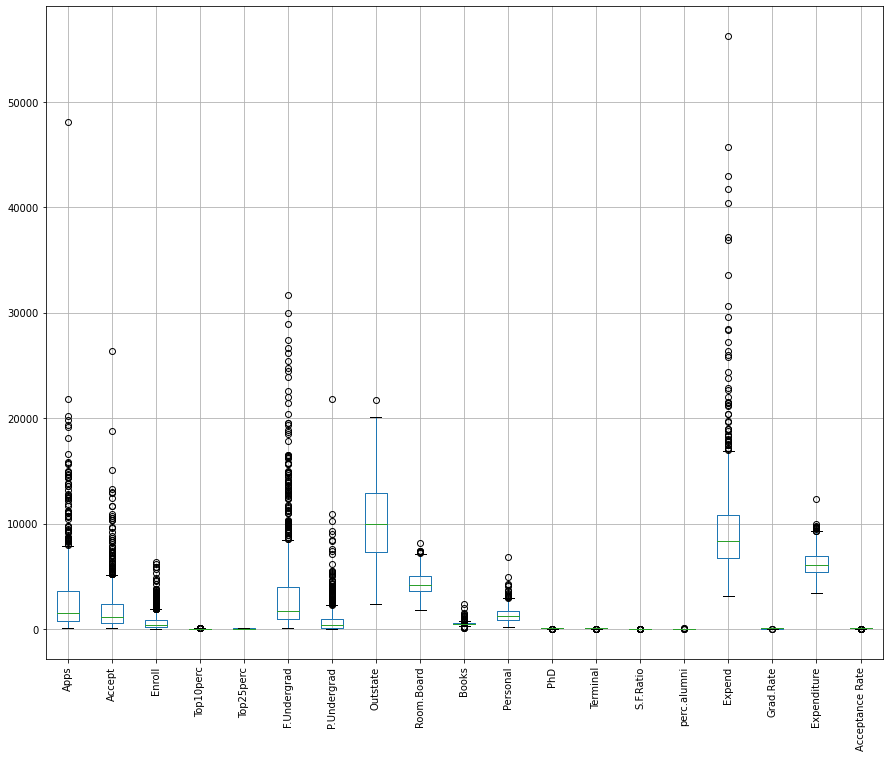

In [104]:
print('Boxplot for original data:-')
df.boxplot(figsize = (15,12))
plt.xticks(rotation = 90);

In [105]:
print('Scaled data(Z scale)')
df_new.head()

Scaled data(Z scale)


Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0 -0.346882 -0.321205 -0.063509  -0.258583  -0.191827    -0.168116   
1 -0.210884 -0.038703 -0.288584  -0.655656  -1.353911    -0.209788   
2 -0.406866 -0.376318 -0.478121  -0.315307  -0.292878    -0.549565   
3 -0.668261 -0.681682 -0.692427   1.840231   1.677612    -0.658079   
4 -0.726176 -0.764555 -0.780735  -0.655656  -0.596031    -0.711924   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0    -0.209207 -0.746356   -0.964905 -0.602312  1.270045 -0.163028 -0.115729   
1     0.244307  0.457496    1.909208  1.215880  0.235515 -2.675646 -3.378176   
2    -0.497090  0.201305   -0.554317 -0.905344 -0.259582 -1.204845 -0.931341   
3    -0.520752  0.626633    0.996791 -0.602312 -0.688173  1.185206  1.175657   
4     0.009005 -0.716508   -0.216723  1.518912  0.235515  0.204672 -0.523535   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  Expenditure  Acceptance Rate  
0   1.013776    -0.867574 -0.501910  -0.317993    -0.244850        -0.032372  
1  -0.477704    -0.544572  0.166110  -0.551805     2.018095         0.906193  
2  -0.300749     0.585935 -0.177290  -0.668710    -0.767385         0.144750  
3  -1.615274     1.151188  1.792851  -0.376446     0.434033         0.612225  
4  -0.553542    -1.675079  0.241803  -2.948375     0.141908         0.064955

Boxplot for scaled data


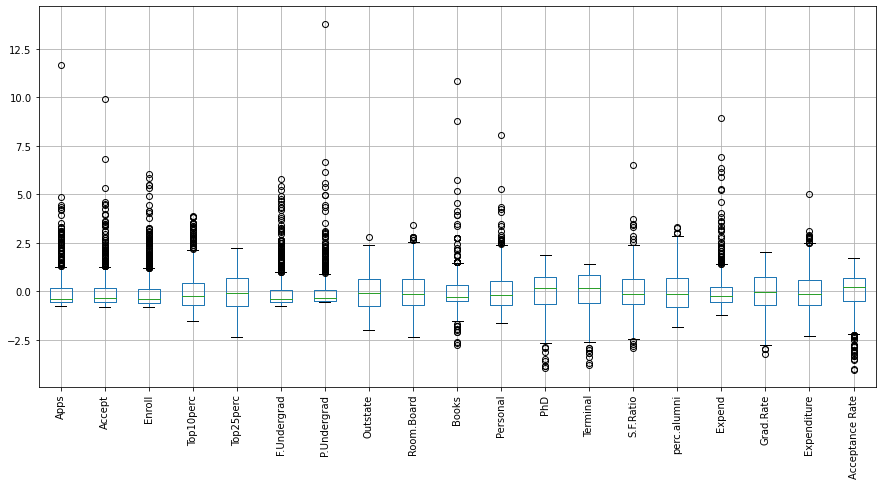

In [106]:
print('Boxplot for scaled data')
df_new.boxplot(figsize = (15,7));
plt.xticks(rotation = 90);

#### Inferences: -


# Q2.5 Build the covariance matrix and calculate the eigenvalues and the eigenvector.

- Before going into the covariance matrix, one must perform the Bartlett and KMO test

#### Bartlett test, tests the hypothesis that the variables are uncorelated
- H0: Variables in the data are uncorelated
- H1: At least one pair of Variables is corelated

In [108]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

In [109]:
chi_sq_value, p_value = calculate_bartlett_sphericity(df_new)

In [155]:
p_value

0.0

#### KMO Test checks the samppling adequacy
- Gives MSA(Measure of sampling adequacy), which should be greater than .5
- Greater value than .05 suggests significant reduction

In [111]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(df1)
print(kmo_model)
print('The KMO values is more than .05, hence significan reduction is expected')

0.6788983266596088
The KMO values is more than .05, hence significan reduction is expected


#### Building the covariance matrix and calculating eigen values and eigen vectors

In [118]:
# We have added few additional columns, reading the original data again
df = pd.read_csv('Education+-+Post+12th+Standard.csv')
df1 = df.drop('Names',axis =1)
df_new = df1.apply(zscore)

In [139]:
cov_mat = np.cov(df_new.T).T
print(cov_mat)

[[ 1.00128866  0.94466636  0.84791332  0.33927032  0.35209304  0.81554018
   0.3987775   0.05022367  0.16515151  0.13272942  0.17896117  0.39120081
   0.36996762  0.09575627 -0.09034216  0.2599265   0.14694372]
 [ 0.94466636  1.00128866  0.91281145  0.19269493  0.24779465  0.87534985
   0.44183938 -0.02578774  0.09101577  0.11367165  0.20124767  0.35621633
   0.3380184   0.17645611 -0.16019604  0.12487773  0.06739929]
 [ 0.84791332  0.91281145  1.00128866  0.18152715  0.2270373   0.96588274
   0.51372977 -0.1556777  -0.04028353  0.11285614  0.28129148  0.33189629
   0.30867133  0.23757707 -0.18102711  0.06425192 -0.02236983]
 [ 0.33927032  0.19269493  0.18152715  1.00128866  0.89314445  0.1414708
  -0.10549205  0.5630552   0.37195909  0.1190116  -0.09343665  0.53251337
   0.49176793 -0.38537048  0.45607223  0.6617651   0.49562711]
 [ 0.35209304  0.24779465  0.2270373   0.89314445  1.00128866  0.19970167
  -0.05364569  0.49002449  0.33191707  0.115676   -0.08091441  0.54656564
   0.5254

In [140]:
print('The covariance matrix contains:',cov_mat.shape[0],'rows and',cov_mat.shape[1],'columns')

The covariance matrix contains: 17 rows and 17 columns


In [141]:
eig_val,eig_vec = np.linalg.eig(cov_mat)

In [142]:
print("Eigen values: -")
eig_val

Eigen values: -


array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

In [154]:
print('Eigen vectors: -')
eig_vec

Eigen vectors: -


array([[-2.48765602e-01,  3.31598227e-01,  6.30921033e-02,
        -2.81310530e-01,  5.74140964e-03,  1.62374420e-02,
         4.24863486e-02,  1.03090398e-01,  9.02270802e-02,
        -5.25098025e-02,  3.58970400e-01, -4.59139498e-01,
         4.30462074e-02, -1.33405806e-01,  8.06328039e-02,
        -5.95830975e-01,  2.40709086e-02],
       [-2.07601502e-01,  3.72116750e-01,  1.01249056e-01,
        -2.67817346e-01,  5.57860920e-02, -7.53468452e-03,
         1.29497196e-02,  5.62709623e-02,  1.77864814e-01,
        -4.11400844e-02, -5.43427250e-01,  5.18568789e-01,
        -5.84055850e-02,  1.45497511e-01,  3.34674281e-02,
        -2.92642398e-01, -1.45102446e-01],
       [-1.76303592e-01,  4.03724252e-01,  8.29855709e-02,
        -1.61826771e-01, -5.56936353e-02,  4.25579803e-02,
         2.76928937e-02, -5.86623552e-02,  1.28560713e-01,
        -3.44879147e-02,  6.09651110e-01,  4.04318439e-01,
        -6.93988831e-02, -2.95896092e-02, -8.56967180e-02,
         4.44638207e-01,  1.1

In [152]:
eig_vec.shape

(17, 17)

# Q2.6 Write the explicit form of the first PC (in terms of Eigen Vectors).

The explicit form can be expressed as : -
- a1x1 + a2x2 + a3x3 + a4x4 + a5x5..............a19x19
- where a1, a2, a3.....a19 are the loadings that we found from eigen vectors
and x1, x2, x3,......x19 are 1st values of the 19 variables each

In [143]:
print('Values of the loadings are : -\n')
print(eig_vec.T[0])

Values of the loadings are : -

[-0.2487656  -0.2076015  -0.17630359 -0.35427395 -0.34400128 -0.15464096
 -0.0264425  -0.29473642 -0.24903045 -0.06475752  0.04252854 -0.31831287
 -0.31705602  0.17695789 -0.20508237 -0.31890875 -0.25231565]


In [178]:
print('Values of x1...x17 are: -')
a = df_new.iloc[0][:]
a

Values of x1...x17 are: -


Apps          -0.346882
Accept        -0.321205
Enroll        -0.063509
Top10perc     -0.258583
Top25perc     -0.191827
F.Undergrad   -0.168116
P.Undergrad   -0.209207
Outstate      -0.746356
Room.Board    -0.964905
Books         -0.602312
Personal       1.270045
PhD           -0.163028
Terminal      -0.115729
S.F.Ratio      1.013776
perc.alumni   -0.867574
Expend        -0.501910
Grad.Rate     -0.318252
Name: 0, dtype: float64

In [179]:
print('Explicitly it can be expressed as : -')

for (i,j) in zip(eig_vec.T[0],a) :
    print(i,'x',j,'+')

Explicitly it can be expressed as : -
-0.24876560150819207 x -0.34688181931102013 +
-0.20760150191693857 x -0.32120545330977984 +
-0.17630359161422599 x -0.06350890112710722 +
-0.3542739474699037 x -0.2585828007174153 +
-0.34400127906826955 x -0.19182741580158905 +
-0.15464096160059657 x -0.16811578105948569 +
-0.026442504480413565 x -0.20920713118295584 +
-0.29473641937557804 x -0.7463558876654935 +
-0.24903044871531924 x -0.9649047311227198 +
-0.06475751814562042 x -0.602312158738608 +
0.04252853859910417 x 1.2700451531967583 +
-0.3183128748946761 x -0.16302792483541048 +
-0.3170560161710912 x -0.11572870260631442 +
0.1769578946577989 x 1.013775944192749 +
-0.2050823689915612 x -0.8675741886081831 +
-0.31890875035625815 x -0.5019100843535785 +
-0.2523156539365148 x -0.3182519406494316 +


# Q2.7 Discuss the cumulative values of the eigenvalues. How does it help you to decide on the optimum number of principal components? What do the eigenvectors indicate? Perform PCA and export the data of the Principal Component scores into a data frame.

In [146]:
print('Eigen values: -')
eig_val

Eigen values: -


array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.02302787, 0.03672545, 0.31344588, 0.08802464, 0.1439785 ,
       0.16779415, 0.22061096])

- The eigen values represent the amount of variance captured.
- As per requirement, we must ensure, the PC components must atleast capture 85%.

In [147]:
tot = sum(eig_val)

In [148]:
var_exp = [(i/tot ) * 100 for i in sorted(eig_val,reverse = True)]

In [149]:
np.cumsum(var_exp)

array([ 32.0206282 ,  58.36084263,  65.26175919,  71.18474841,
        76.67315352,  81.65785448,  85.21672597,  88.67034731,
        91.78758099,  94.16277251,  96.00419883,  97.30024023,
        98.28599436,  99.13183669,  99.64896227,  99.86471628,
       100.        ])

#### Scree Plot

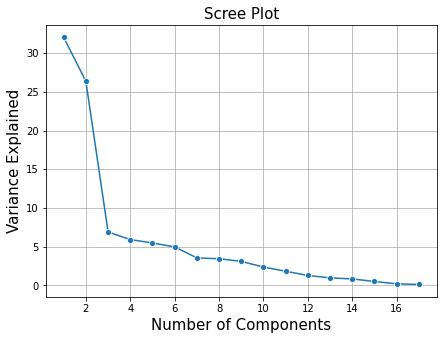

In [164]:
plt.figure(figsize=(7,5))
sns.lineplot(y=var_exp,x=range(1,len(var_exp)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

- It can be observed that there is a steep drop after component 5, but in practicality we need to compare atleast 80% of variance.
- The 80% of the values is touched by the 6th component, and hence we will have to take 6 PC's

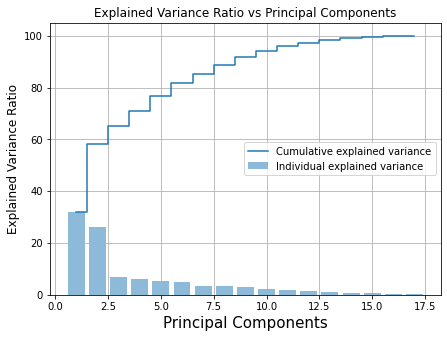

In [165]:
plt.figure(figsize=(7 ,5))
plt.bar(range(1, eig_val.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_val.size + 1), np.cumsum(var_exp), where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio',fontsize=12)
plt.xlabel('Principal Components',fontsize=15)
plt.title('Explained Variance Ratio vs Principal Components',fontsize=12)
plt.legend(loc = 'best')
plt.grid()
plt.show()

#### Using SKLEARN Library for PCA

In [188]:
# Using scikit learn PCA here. 
#It does all the above steps and maps data to PCA dimensions in one shot

from sklearn.decomposition import PCA

#NOTE: we are generating only 6 PCA dimensions (dim. reduction from 17 to 6)

pca = PCA(n_components=6) 
data_reduced = pca.fit_transform(df_new)
data_reduced.transpose()

array([[-1.59285540e+00, -2.19240180e+00, -1.43096371e+00, ...,
        -7.32560596e-01,  7.91932735e+00, -4.69508066e-01],
       [ 7.67333510e-01, -5.78829984e-01, -1.09281889e+00, ...,
        -7.72352397e-02, -2.06832886e+00,  3.66660943e-01],
       [-1.01073539e-01,  2.27879812e+00, -4.38092811e-01, ...,
        -4.05636996e-04,  2.07356367e+00, -1.32891515e+00],
       [-9.21749409e-01,  3.58891826e+00,  6.77240527e-01, ...,
         5.43163097e-02,  8.52053924e-01, -1.08022550e-01],
       [-7.43975420e-01,  1.05999667e+00, -3.69613275e-01, ...,
        -5.16021061e-01, -9.47754888e-01, -1.13217592e+00],
       [-2.98306019e-01, -1.77137489e-01, -9.60591686e-01, ...,
         4.68014085e-01, -2.06993697e+00,  8.39893050e-01]])

In [167]:
print('The reduced data has',data_reduced.shape[0],'columns and ',data_reduced.shape[1],'columns')

The reduced data has 777 columns and  6 columns


- The 6 columns are the Principal components
- 777 rows are the PC belonging to each of the 777 values


In [189]:
pca.components_

array([[ 0.2487656 ,  0.2076015 ,  0.17630359,  0.35427395,  0.34400128,
         0.15464096,  0.0264425 ,  0.29473642,  0.24903045,  0.06475752,
        -0.04252854,  0.31831287,  0.31705602, -0.17695789,  0.20508237,
         0.31890875,  0.25231565],
       [ 0.33159823,  0.37211675,  0.40372425, -0.08241182, -0.04477866,
         0.41767377,  0.31508783, -0.24964352, -0.13780888,  0.05634184,
         0.21992922,  0.05831132,  0.04642945,  0.24666528, -0.24659527,
        -0.13168986, -0.16924053],
       [-0.0630921 , -0.10124906, -0.08298557,  0.03505553, -0.02414794,
        -0.06139298,  0.13968172,  0.04659887,  0.14896739,  0.67741165,
         0.49972112, -0.12702837, -0.06603755, -0.2898484 , -0.14698927,
         0.22674398, -0.20806465],
       [ 0.28131053,  0.26781735,  0.16182677, -0.05154725, -0.10976654,
         0.10041234, -0.15855849,  0.13129136,  0.18499599,  0.08708922,
        -0.23071057, -0.53472483, -0.51944302, -0.16118949,  0.01731422,
         0.07927349

- The above table shows the loadings on the variables,which is same as the eigen vectors
- The only difference is of the sign

In [170]:
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701])

In [171]:
var=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=3)*100)
var

array([32. , 58.3, 65.2, 71.1, 76.6, 81.6])

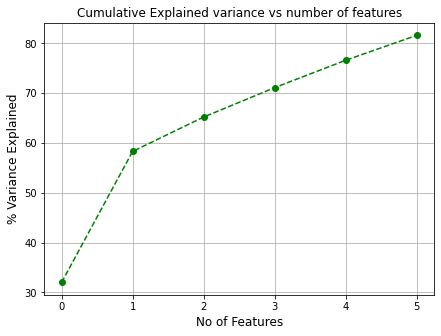

In [177]:
plt.figure(figsize=(7,5))
plt.plot(var, marker='o',linestyle='--',color='green')
plt.ylabel('% Variance Explained',fontsize=12)
plt.xlabel('No of Features',fontsize=12)
plt.title('Cumulative Explained variance vs number of features',fontsize=12)
plt.grid()
plt.show()

#### Loading of variables

In [195]:
df_PC = pd.DataFrame(pca.components_,columns = df_new.columns.tolist())
df_PC

Apps    Accept    Enroll  Top10perc  Top25perc  F.Undergrad  \
0  0.248766  0.207602  0.176304   0.354274   0.344001     0.154641   
1  0.331598  0.372117  0.403724  -0.082412  -0.044779     0.417674   
2 -0.063092 -0.101249 -0.082986   0.035056  -0.024148    -0.061393   
3  0.281311  0.267817  0.161827  -0.051547  -0.109767     0.100412   
4  0.005741  0.055786 -0.055694  -0.395434  -0.426534    -0.043454   
5 -0.016237  0.007535 -0.042558  -0.052693   0.033092    -0.043454   

   P.Undergrad  Outstate  Room.Board     Books  Personal       PhD  Terminal  \
0     0.026443  0.294736    0.249030  0.064758 -0.042529  0.318313  0.317056   
1     0.315088 -0.249644   -0.137809  0.056342  0.219929  0.058311  0.046429   
2     0.139682  0.046599    0.148967  0.677412  0.499721 -0.127028 -0.066038   
3    -0.158558  0.131291    0.184996  0.087089 -0.230711 -0.534725 -0.519443   
4     0.302385  0.222532    0.560919 -0.127289 -0.222311  0.140166  0.204720   
5    -0.191199 -0.030000    0.162755  0.641055 -0.331398  0.091256  0.154928   

   S.F.Ratio  perc.alumni    Expend  Grad.Rate  
0  -0.176958     0.205082  0.318909   0.252316  
1   0.246665    -0.246595 -0.131690  -0.169241  
2  -0.289848    -0.146989  0.226744  -0.208065  
3  -0.161189     0.017314  0.079273   0.269129  
4  -0.079388    -0.216297  0.075958  -0.109268  
5   0.487046    -0.047340 -0.298119   0.216163

In [174]:
data_redu = pd.DataFrame(data_reduced,columns = [['PC0','PC1','PC2','PC3','PC4','PC5']])
data_redu

PC0       PC1       PC2       PC3       PC4       PC5
0   -1.592855  0.767334 -0.101074 -0.921749 -0.743975 -0.298306
1   -2.192402 -0.578830  2.278798  3.588918  1.059996 -0.177137
2   -1.430964 -1.092819 -0.438093  0.677241 -0.369613 -0.960592
3    2.855557 -2.630612  0.141722 -1.295486 -0.183837 -1.059509
4   -2.212008  0.021631  2.387030 -1.114538  0.684451  0.004918
..        ...       ...       ...       ...       ...       ...
772 -3.328458  1.220255 -0.383388  0.108555  0.776996  0.309429
773  0.199389 -0.686689  0.051564  0.562269  0.375191  0.373343
774 -0.732561 -0.077235 -0.000406  0.054316 -0.516021  0.468014
775  7.919327 -2.068329  2.073564  0.852054 -0.947754 -2.069937
776 -0.469508  0.366661 -1.328915 -0.108023 -1.132176  0.839893

[777 rows x 6 columns]

In [175]:
data_redu.corr().round(5)

PC0  PC1  PC2  PC3  PC4  PC5
PC0  1.0 -0.0 -0.0  0.0  0.0 -0.0
PC1 -0.0  1.0  0.0  0.0  0.0  0.0
PC2 -0.0  0.0  1.0 -0.0 -0.0  0.0
PC3  0.0  0.0 -0.0  1.0 -0.0  0.0
PC4  0.0  0.0 -0.0 -0.0  1.0  0.0
PC5 -0.0  0.0  0.0  0.0  0.0  1.0

<AxesSubplot:xlabel='None', ylabel='None'>

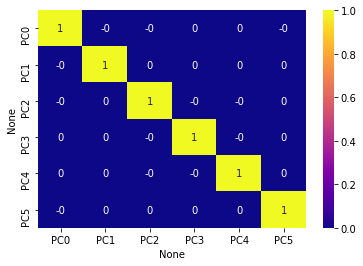

In [176]:
sns.heatmap(data_redu.corr().round(2),annot = True, cmap = 'plasma')

- As we can observe, the issue of colinearity is solved, and the components are no longer corelated

In [180]:
df_cat = df.select_dtypes(include = ['int64, float64'])

In [183]:
from matplotlib.patches import Rectangle

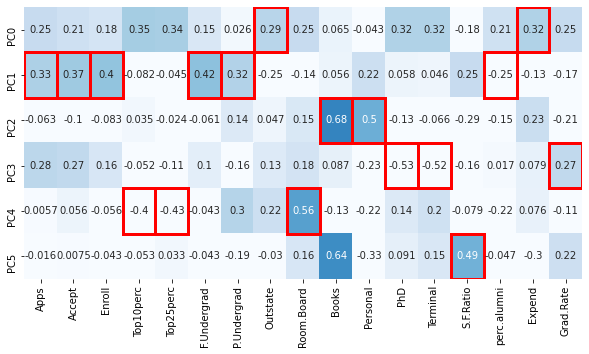

In [194]:
fig,ax = plt.subplots(figsize=(10, 5), facecolor='w', edgecolor='k')
ax = sns.heatmap(df_PC, annot=True, vmax=1.0, vmin=0, cmap='Blues', 
                 cbar=False, fmt='.2g', ax=ax,
                 yticklabels=['PC0','PC1','PC2','PC3','PC4','PC5'])

column_max = df_PC.abs().idxmax(axis=0)

for col, variable in enumerate(df_PC.columns):
    position = df_PC.abs().index.get_loc(column_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, 
                           edgecolor='red', lw=3))